<h1>Problem Statement</h1>

<p>The objective of this project is to develop a machine learning model that accurately predicts the manufacturer's suggested retail price (Base MSRP) of vehicles based on their features. By leveraging regression algorithms and utilizing the available dataset, we aim to estimate the price of vehicles in a way that benefits both consumers and manufacturers.</p>

<h1>Date: 28/10/2023</h1><br>
<p> 
    
● Analyze the relevance and importance of each feature in predicting Base MSRP.

● Conduct feature selection techniques such as correlation analysis, backward/forward selection, or Lasso regression to identify the most influential features.

● Engineer new features by combining or transforming existing variables that might enhance the predictive power of the model.

● Select appropriate regression algorithms (e.g., linear regression, decision trees, random forests, gradient boosting) to build the Base MSRP prediction model.

● Split the dataset into training and testing sets, ensuring sufficient data for both.

● Train the selected regression models on the training set and assess their performance on the testing set.

● Optimize the model's hyperparameters to improve its performance.

● Utilize techniques such as grid search, random search, or Bayesian optimization to explore different hyperparameter combinations.

● Fine-tune the model based on evaluation metrics like mean squared error (MSE), root mean squared error (RMSE), or R-squared to achieve the best possible performance.

● Evaluate the final Base MSRP prediction model using appropriate regression evaluation metrics on the testing set.

Provide insights into the factors that significantly influence the vehicle's retail price and their respective contributions.
Provide recommendations based on the insights gained from the model, such as the most influential features affecting the Base MSRP and potential strategies for pricing adjustments or market positioning.
</p>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### Reading the Data from file

In [2]:
df=pd.read_csv('EV_Registration_Dataset.csv')
df.head()

,Identifier,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KL8CL6S05E,Tacoma,98407.0,2014,CHEVROLET,SPARK,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,82.0,0.0,27.0,259013639,POINT (-122.5113356 47.29238280000004),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
1,JTDKARFP0H,Port Townsend,98368.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,24.0,220589904,POINT (-122.76441969999996 48.11958740000006),BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...,5.303195e+10
2,JHMZC5F34J,Vashon,98070.0,2018,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47.0,0.0,34.0,109177015,POINT (-122.45867519999996 47.448468700000035),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,KMHC65LD0K,Ridgefield,98642.0,2019,HYUNDAI,IONIQ,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29.0,0.0,18.0,196216282,POINT (-122.74348499999996 45.81886000000003),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
4,1N4AZ1CP6J,Bremerton,98337.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,26.0,187956821,POINT (-122.63590499999998 47.570970000000045),PUGET SOUND ENERGY INC,5.303508e+10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 15 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Identifier                                         135038 non-null  object 
 1   City                                               135030 non-null  object 
 2   Postal Code                                        135030 non-null  float64
 3   Model Year                                         135038 non-null  int64  
 4   Make                                               135038 non-null  object 
 5   Model                                              134789 non-null  object 
 6   Electric Vehicle Type                              135038 non-null  object 
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  135038 non-null  object 
 8   Electric Range                                     135037 non-null  float6

In [4]:
# Datatypes are matching correctly with the domain.

In [5]:
df.drop(columns=['Identifier'],inplace=True)

In [6]:
# Identifier is not a significant feature for my analysis

In [7]:
df.head()

,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,Tacoma,98407.0,2014,CHEVROLET,SPARK,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,82.0,0.0,27.0,259013639,POINT (-122.5113356 47.29238280000004),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
1,Port Townsend,98368.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,24.0,220589904,POINT (-122.76441969999996 48.11958740000006),BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...,5.303195e+10
2,Vashon,98070.0,2018,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47.0,0.0,34.0,109177015,POINT (-122.45867519999996 47.448468700000035),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,Ridgefield,98642.0,2019,HYUNDAI,IONIQ,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29.0,0.0,18.0,196216282,POINT (-122.74348499999996 45.81886000000003),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
4,Bremerton,98337.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,26.0,187956821,POINT (-122.63590499999998 47.570970000000045),PUGET SOUND ENERGY INC,5.303508e+10


### Checking Data

<b>Missing values</b>

In [8]:
df.isnull().sum()/len(df)*100

City                                                 0.005924
Postal Code                                          0.005924
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.184393
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000741
Base MSRP                                            0.000741
Legislative District                                 0.231046
Vehicle ID                                           0.000000
Vehicle Location                                     0.007405
Electric Utility                                     0.005924
2020 Census Tract                                    0.005924
dtype: float64

<p> The 'Model' and 'Legislative District' columns contain a higher number of missing values. </p>

In [9]:
# Checking the Model to identify missing values.

df_filter_model = df[df['Model'].isna()] 
result = df_filter_model.groupby(['Make','Electric Vehicle Type']).size().reset_index(name='count')
result

,Make,Electric Vehicle Type,count
0,VOLVO,Battery Electric Vehicle (BEV),249


<p> In the dataset, 'VOLVO' is listed as the 'Make,' and 'Battery Electric Vehicle (BEV)' is categorized under the 'Electric Vehicle Type,' both of which have missing values in the 'Model' column.</p>

In [10]:
df_filter_make = df[df['Make']== 'VOLVO' ] 
df_filter_make = df_filter_make[df_filter_make['Electric Vehicle Type']== 'Battery Electric Vehicle (BEV)'] 
result = df_filter_make.groupby(['Model','Electric Vehicle Type']).size().reset_index(name='count')
result

,Model,Electric Vehicle Type,count
0,C40,Battery Electric Vehicle (BEV),277
1,XC40,Battery Electric Vehicle (BEV),492


 <p> 'XC40' is the most frequently occurring entry under the 'Model' column for 'VOLVO' in the 'Make' category. Therefore, we are assigning 'XC40' to all the missing 'Model' entries. </p>

In [11]:
df['Model'].fillna('XC40', inplace=True)

<p> Checking the 'Legislative District' to identify missing values.</p>

In [12]:
df_filter_lg = df[df['Legislative District'].isna()] 
result = df_filter_lg.groupby('City').size().reset_index(name='count') 
result

,City,count
0,Aldie,2
1,Alexandria,8
2,Alhambra,1
3,Altus,1
4,Andrews Air Force Base,1
...,...,...
199,Weslaco,1
200,Westminster,1
201,Wichita Falls,2
202,Wildomar,1


<p> Given that the 'Legislative District' column has only a minimal number of missing values when analyzed on a 'City' column basis, we can proceed to remove or drop these entries.</p>

<p>Since the number of missing values is minimal for other columns, we can safely remove these data points without significantly affecting our analysis.</p>

In [13]:
df.dropna(inplace=True)
df.isna().sum()

City                                                 0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
Vehicle ID                                           0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

<p> Extract numerical values for longitude and latitude from the 'Vehicle Location' column.</p>

In [14]:
# Utilize regular expressions (regex) to extract numerical values from the 'Vehicle Location' column
reg_expression = r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)';
df[['Longitude', 'Latitude']] = df['Vehicle Location'].str.extract(reg_expression)
df.head(2)

,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Longitude,Latitude
0,Tacoma,98407.0,2014,CHEVROLET,SPARK,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,82.0,0.0,27.0,259013639,POINT (-122.5113356 47.29238280000004),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10,-122.5113356,47.29238280000004
1,Port Townsend,98368.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,24.0,220589904,POINT (-122.76441969999996 48.11958740000006),BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...,5.303195e+10,-122.76441969999996,48.11958740000006


In [15]:
# Convert 'Longitude' and 'Longitude' to numeric
df['Longitude'] = pd.to_numeric(df['Longitude'])
df['Latitude'] = pd.to_numeric(df['Latitude'])

In [16]:
# Remove the 'Vehicle Location' column from the dataset since its values have been converted into the 'Longitude' and 'Latitude' columns.
df = df.drop(columns = 'Vehicle Location')

In [17]:
df.head(2)

,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
0,Tacoma,98407.0,2014,CHEVROLET,SPARK,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,82.0,0.0,27.0,259013639,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10,-122.511336,47.292383
1,Port Townsend,98368.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,24.0,220589904,BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...,5.303195e+10,-122.764420,48.119587


In [18]:
df.isnull().sum()/len(df)*100

City                                                 0.0
Postal Code                                          0.0
Model Year                                           0.0
Make                                                 0.0
Model                                                0.0
Electric Vehicle Type                                0.0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.0
Electric Range                                       0.0
Base MSRP                                            0.0
Legislative District                                 0.0
Vehicle ID                                           0.0
Electric Utility                                     0.0
2020 Census Tract                                    0.0
Longitude                                            0.0
Latitude                                             0.0
dtype: float64

#### Duplicate value in Dataset

In [19]:
df.duplicated().sum()

0

<p> Duplicate value is not present in Dataset.</p>

#### Remove Outliers in Data Set

In [20]:
df.head()

,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
0,Tacoma,98407.0,2014,CHEVROLET,SPARK,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,82.0,0.0,27.0,259013639,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10,-122.511336,47.292383
1,Port Townsend,98368.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,24.0,220589904,BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...,5.303195e+10,-122.764420,48.119587
2,Vashon,98070.0,2018,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47.0,0.0,34.0,109177015,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,-122.458675,47.448469
3,Ridgefield,98642.0,2019,HYUNDAI,IONIQ,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29.0,0.0,18.0,196216282,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10,-122.743485,45.818860
4,Bremerton,98337.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,26.0,187956821,PUGET SOUND ENERGY INC,5.303508e+10,-122.635905,47.570970


In [21]:
con_cols = ['Postal Code','Model Year','Electric Range','Base MSRP','Legislative District','2020 Census Tract','Longitude','Latitude']
cat_cols = ['City','Make','Model','Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Utility']


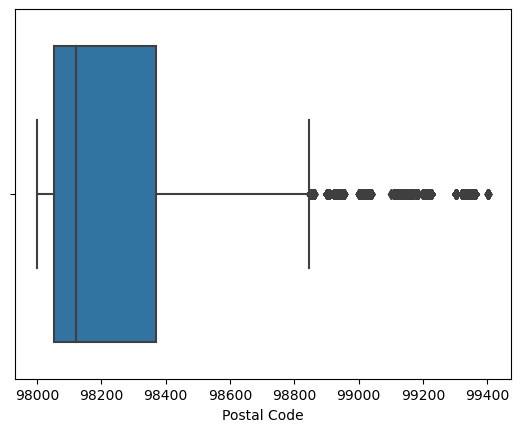

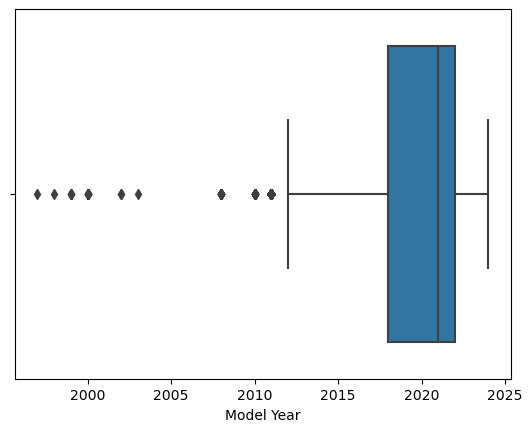

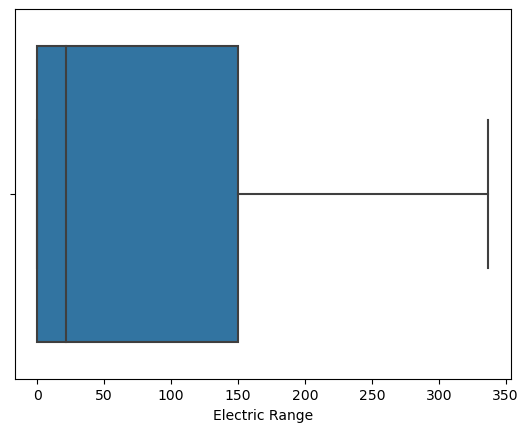

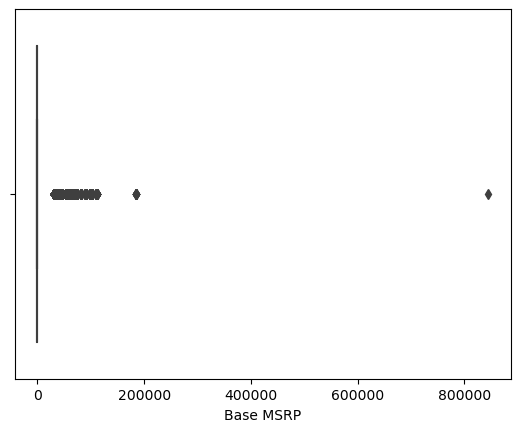

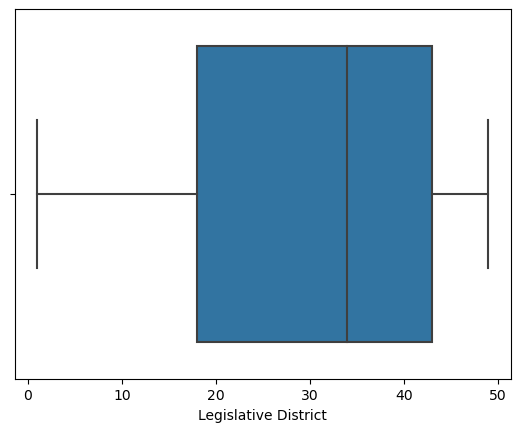

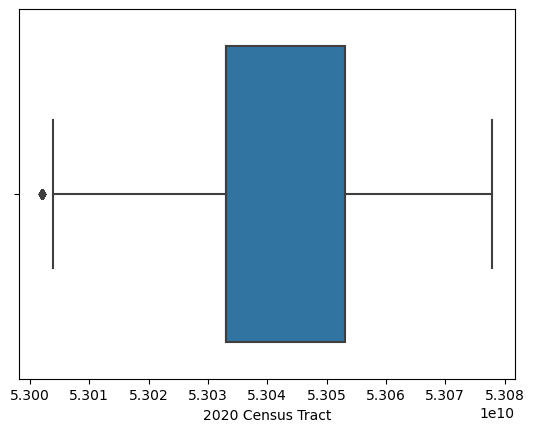

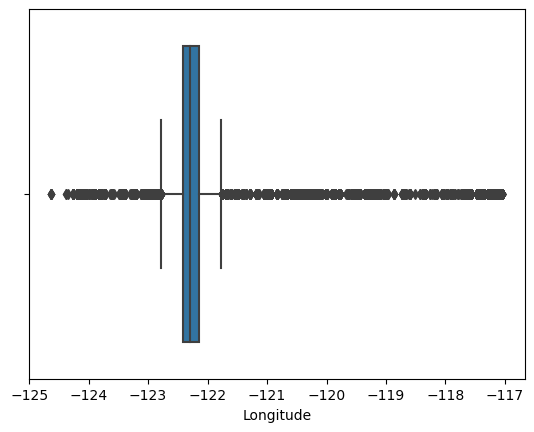

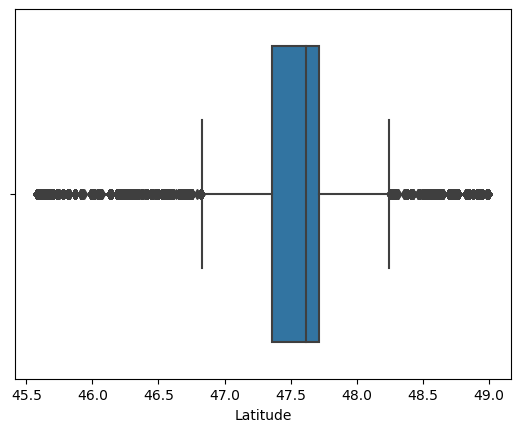

In [22]:
for col in con_cols:
    sns.boxplot(x=col,data=df)
    plt.show()

<p> The presence of extreme outliers in the 'Postal Code,' 'Model Year,' 'Longitude,' and 'Latitude' columns leads us to ignore  outliers.</p>

<p>Most of the values in 'Base MSRP' are zero, so we have decided not to treat these as outliers. </p>

In [23]:
print("Base MSRP Values: ",df['Base MSRP'].unique())
print("*"*100)
print("Base MSRP is Zero: ", np.sum(df['Base MSRP'] == 0))
print("Base MSRP is not Zero: ", np.sum(df['Base MSRP'] != 0))

Base MSRP Values:  [     0.  69900.  36900.  45600.  32250.  53400.  31950.  59900.  64950.
  39995.  98950.  52650.  55700.  34995.  52900.  44100.  33950.  54950.
 102000.  43700.  81100.  32995.  90700. 109000.  36800. 110950. 184400.
  75095.  89100.  91250. 845000.]
****************************************************************************************************
Base MSRP is Zero:  131304
Base MSRP is not Zero:  3419


<p> Since the majority of values in the 'Base MSRP' column are zero, and our target variable is also 'Base MSRP,' we should remove all rows where 'Base MSRP' equals zero.</p>

In [24]:
df = df[df['Base MSRP'] != 0]
print("Base MSRP is Zero: ", np.sum(df['Base MSRP'] == 0))

Base MSRP is Zero:  0


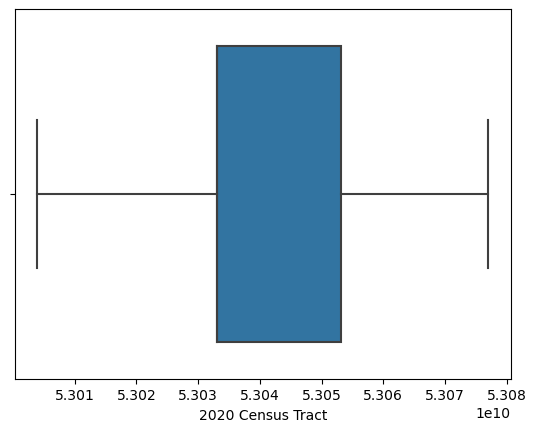

In [25]:
# Flooring and Capping for removing outliers 
columns = ['2020 Census Tract']
for column in columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    ll = q1 - (1.5 * iqr)
    ul = q3 + (1.5 * iqr)
    for index in df[column].index:
        if df.loc[index,column]>ul:
            df.loc[index,column]=ul
        if df.loc[index,column]<ll:
            df.loc[index,column]=ll

# After removing outliers from '2020 Census Tract'
for column in columns:
    sns.boxplot(x=column,data=df)
    plt.show()

<h1>EDA</h1>

In [26]:
print(con_cols)
print(cat_cols )

['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', '2020 Census Tract', 'Longitude', 'Latitude']
['City', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']


<b> Univariate Analysis <b>

In [27]:
# Continuous Data - Histogram or KDE

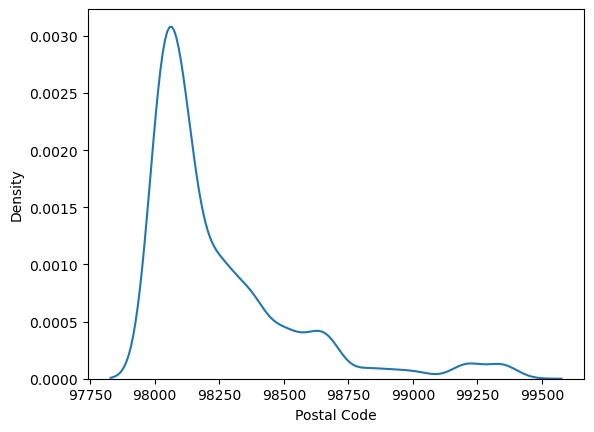

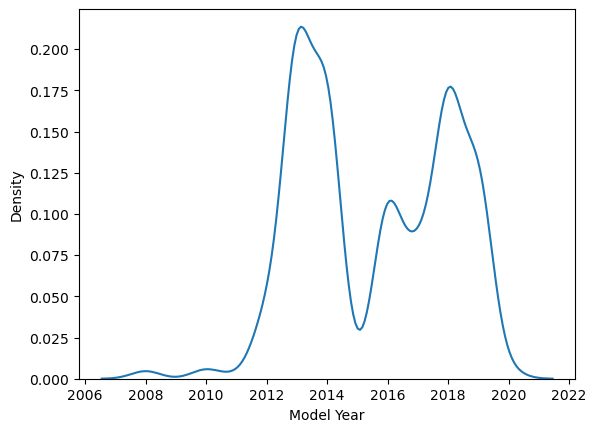

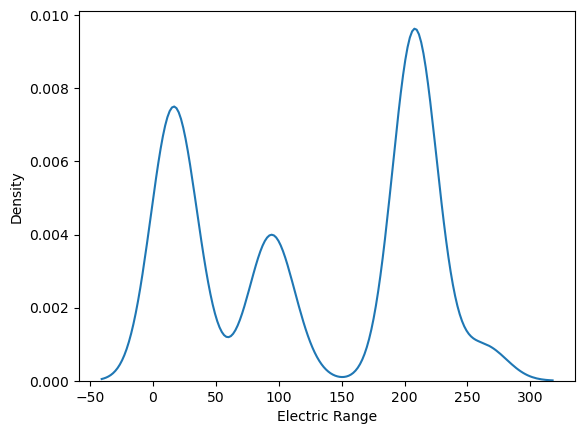

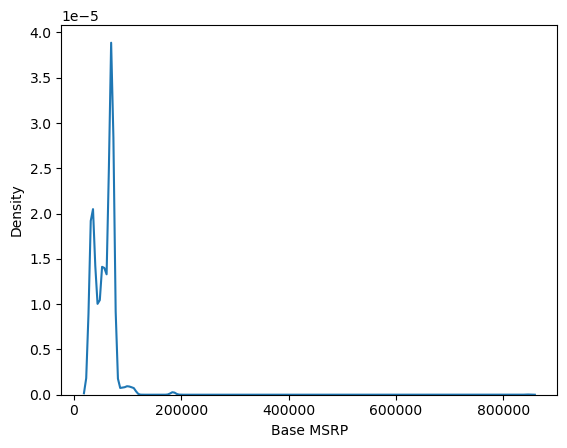

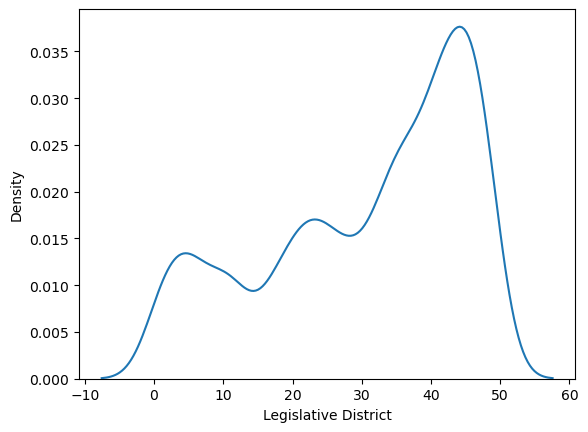

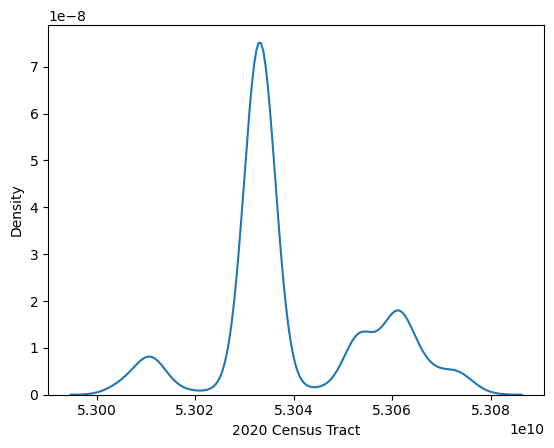

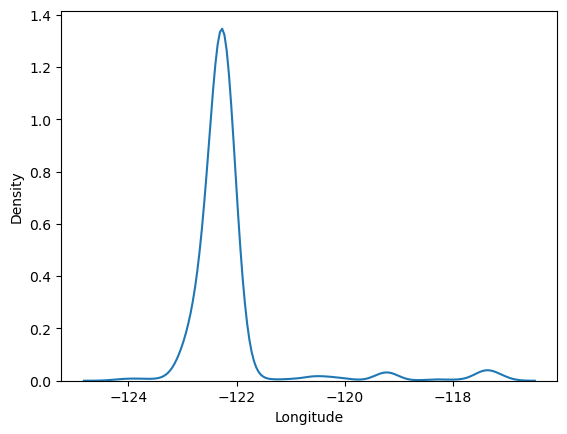

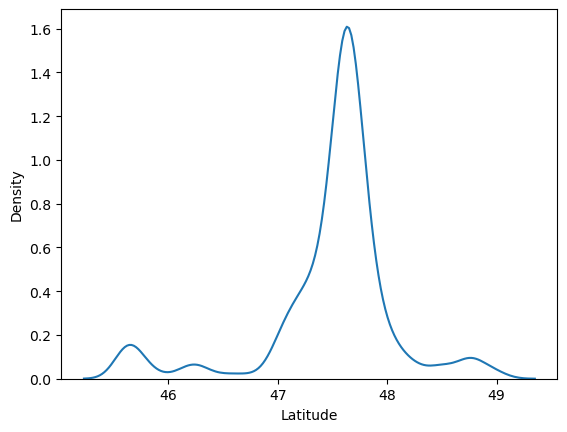

In [28]:
for col in con_cols:
    sns.kdeplot(x=col,data=df)
    plt.show()

In [29]:
for col in con_cols:
    print(col,":",df[col].skew())

Postal Code : 1.9452094121019894
Model Year : -0.07617064728080457
Electric Range : -0.0668343400311435
Base MSRP : 12.648604529446743
Legislative District : -0.6169530441774441
2020 Census Tract : 0.34757095856602294
Longitude : 3.76506188552901
Latitude : -1.308659542186591


<p>negatively skewed - Latitude
    
positively skewed - Postal Code, Base MSRP, Longitude
    
symmetric skewed - Model Year, Electric Range, Legislative District, 2020 Census Tract 
 </p>

In [30]:
# Normalize skewed variables in Python

In [31]:
df['Base MSRP'].value_counts(normalize=True).round(2)

69900.0     0.42
31950.0     0.12
52900.0     0.06
32250.0     0.04
54950.0     0.04
59900.0     0.04
39995.0     0.04
36900.0     0.03
44100.0     0.03
64950.0     0.03
45600.0     0.02
33950.0     0.02
34995.0     0.02
52650.0     0.02
55700.0     0.01
36800.0     0.01
53400.0     0.01
110950.0    0.01
98950.0     0.01
81100.0     0.01
75095.0     0.00
90700.0     0.00
102000.0    0.00
43700.0     0.00
184400.0    0.00
109000.0    0.00
89100.0     0.00
32995.0     0.00
91250.0     0.00
845000.0    0.00
Name: Base MSRP, dtype: float64

In [32]:
# positively skewed - Postal Code, Base MSRP, Longitude

# Square Root Transformation:
pos_skewed_col = ['Postal Code', 'Base MSRP']
for col in pos_skewed_col:
    df[col] = np.sqrt(df[col])

In [33]:
# negatively skewed - Latitude
# Square Transformation:
neg_skewed_col = ['Latitude']
for col in neg_skewed_col:
    df[col] = np.square(df[col])

In [34]:
df.head()

,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
49,Burien,313.314538,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,264.386081,34.0,227099512,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,-122.341020,2253.014511
79,Tacoma,313.695712,2019,MINI,COUNTRYMAN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,12.0,192.093727,27.0,203153492,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10,-122.451530,2232.669759
82,Spanaway,313.667021,2018,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,213.541565,29.0,129349279,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10,-122.435115,2218.833920
84,Tacoma,313.759462,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,179.582850,29.0,211099766,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10,-122.408720,2224.600898
134,Woodinville,313.164494,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,264.386081,45.0,106632725,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,-122.151665,2280.879098


In [35]:
# Categorical Data - Bar graphs

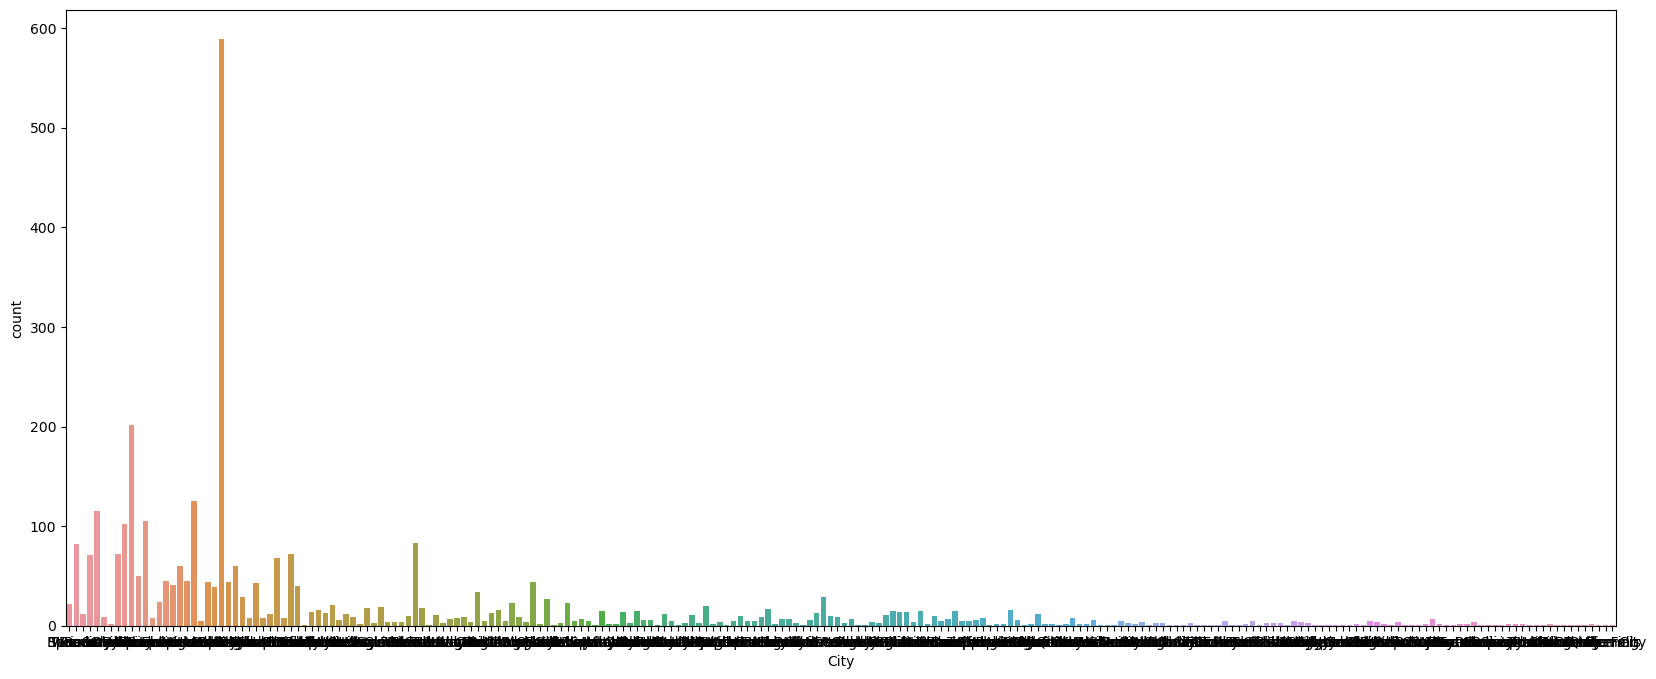

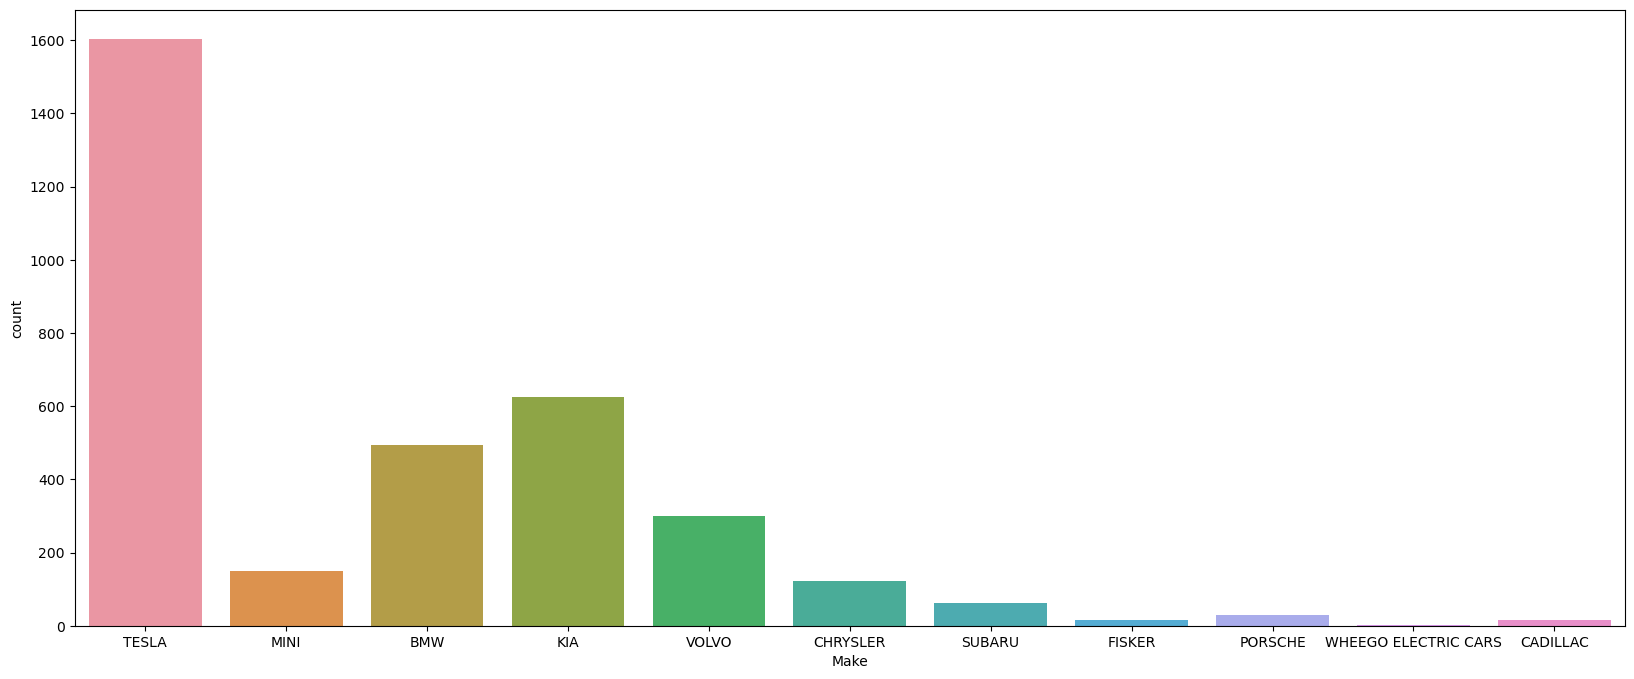

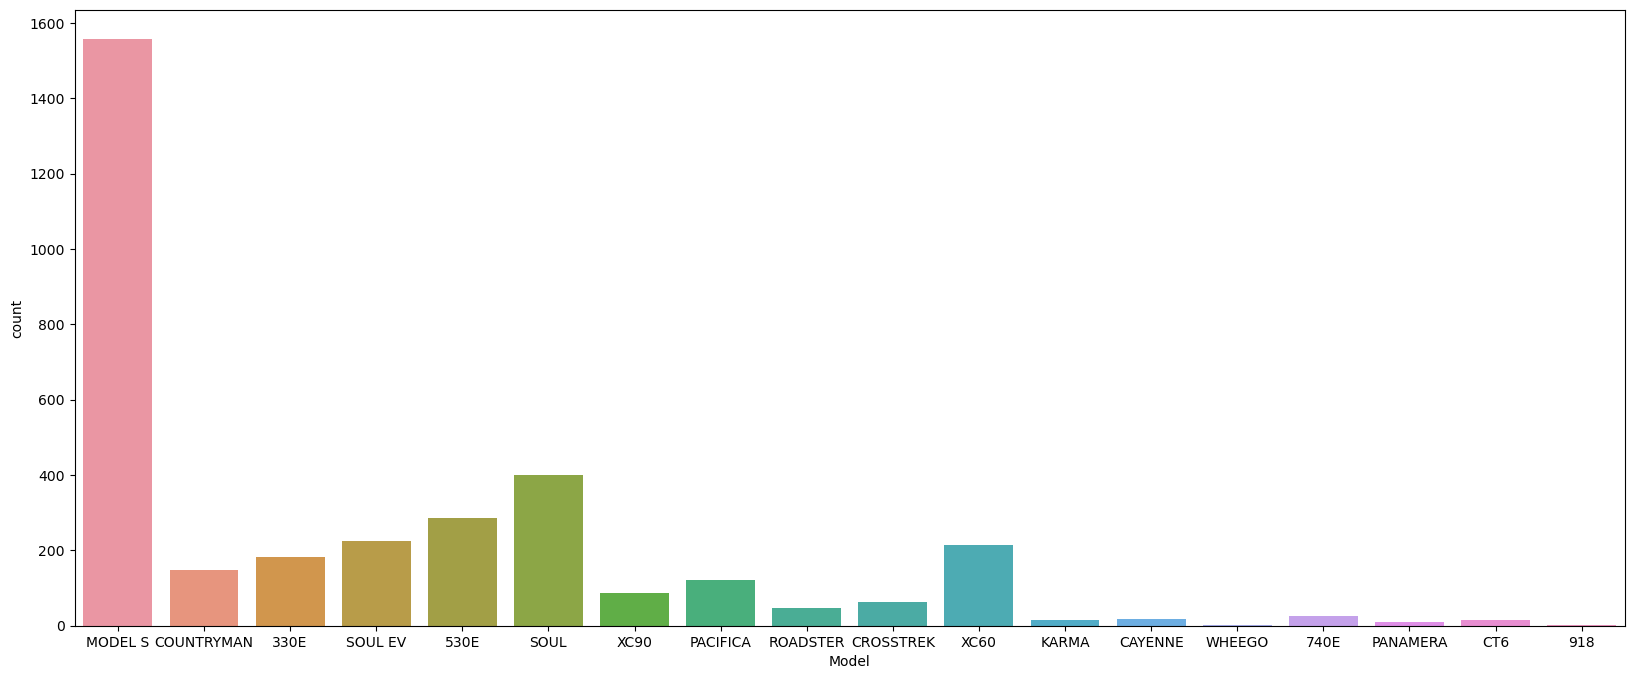

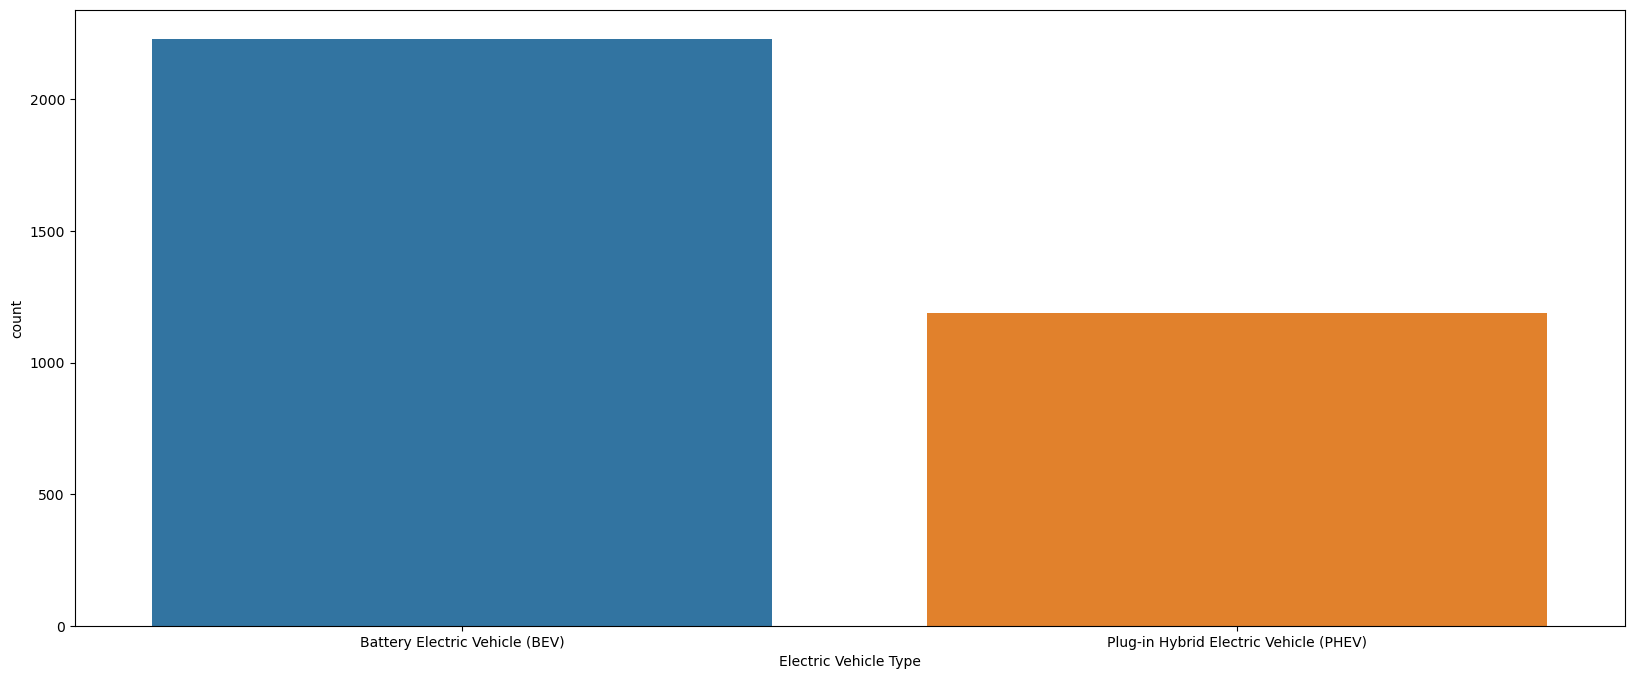

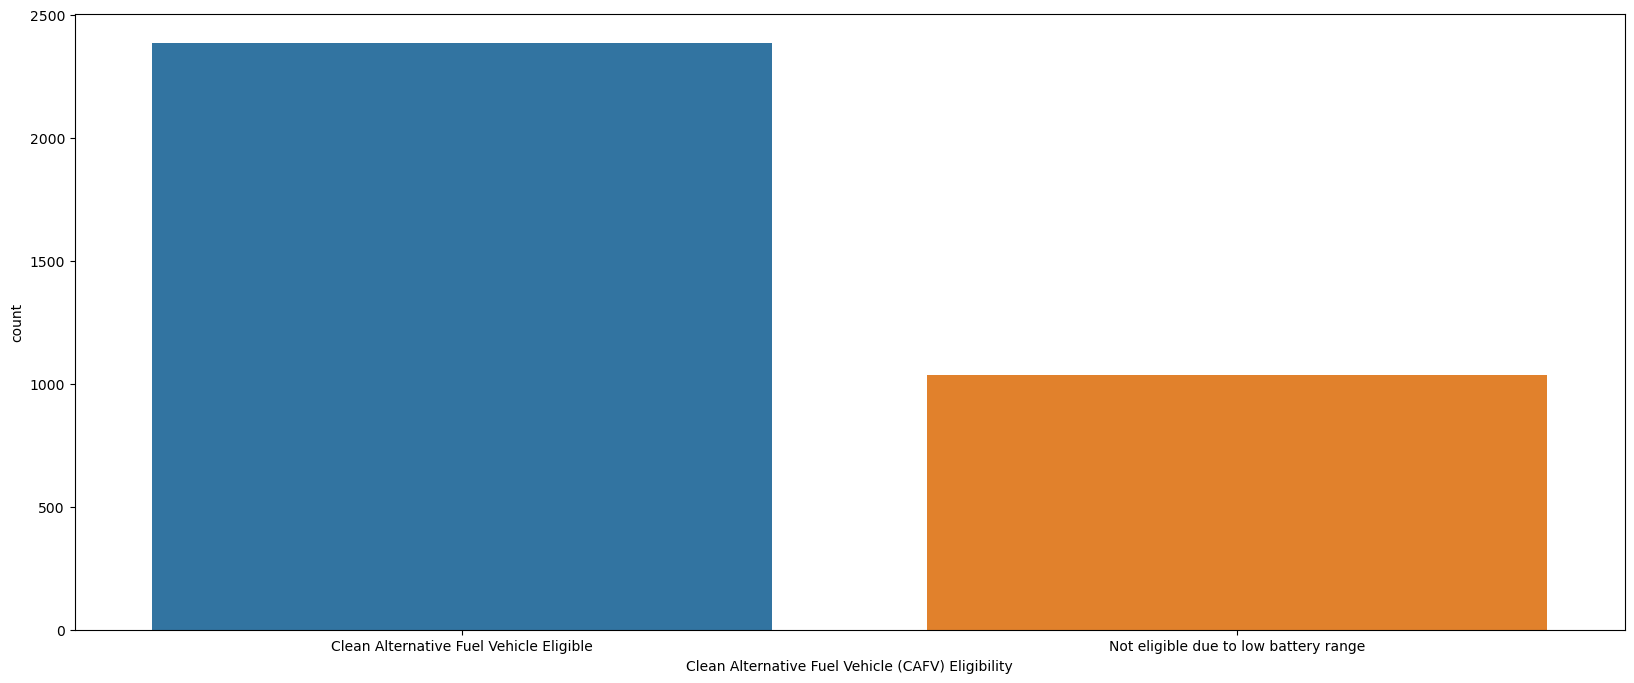

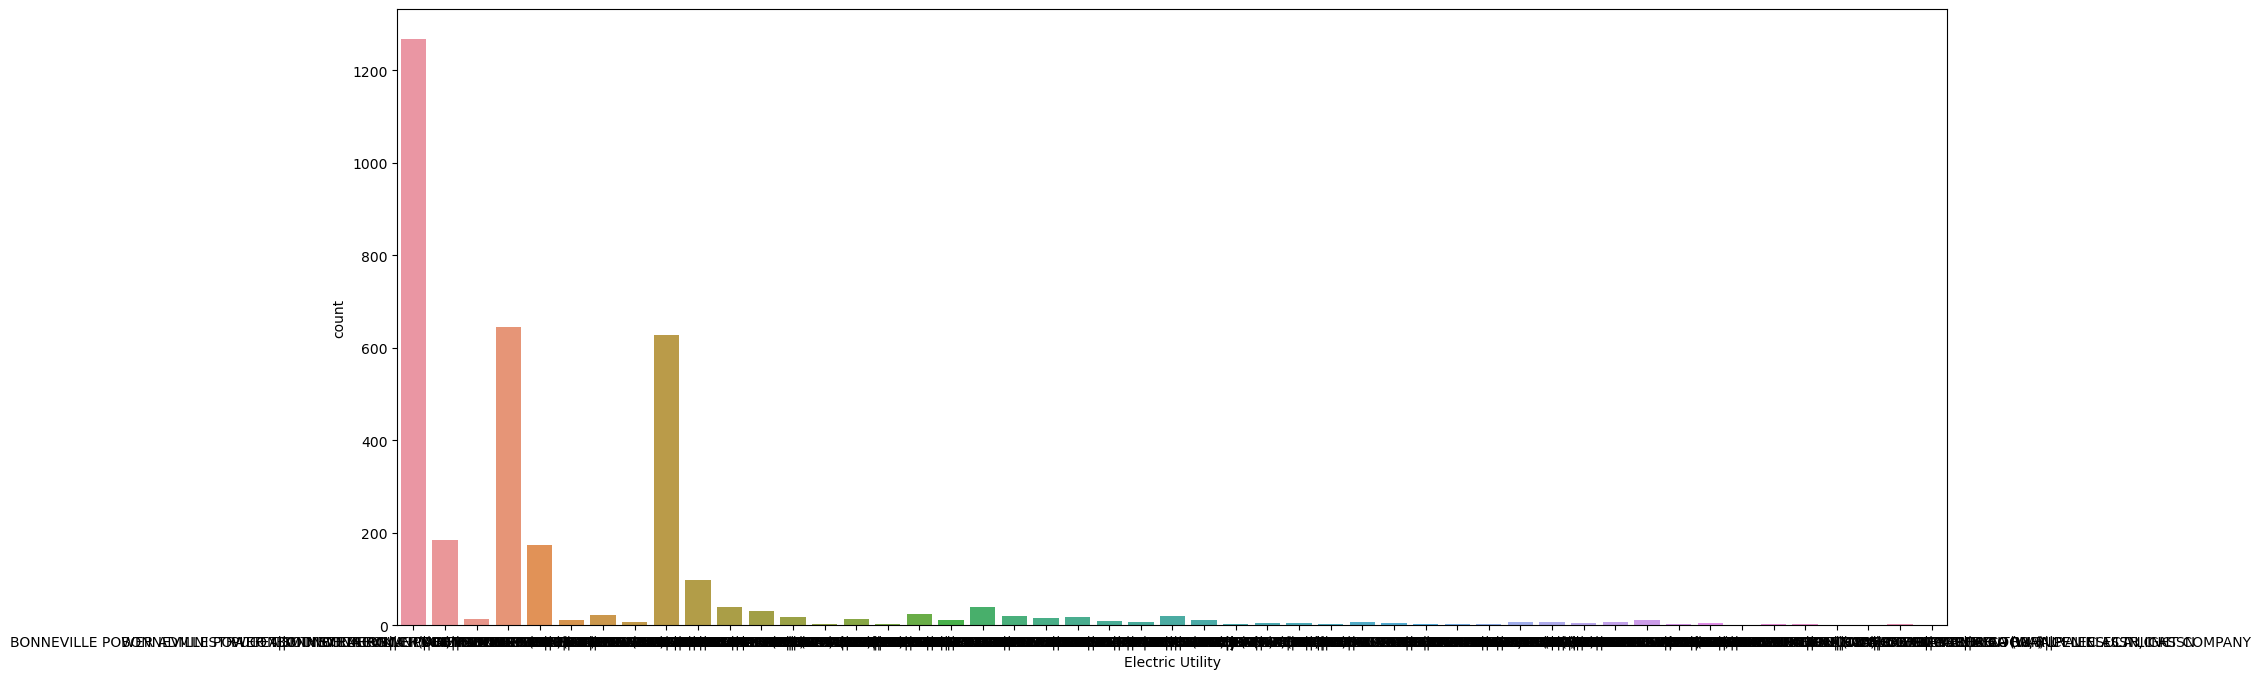

In [36]:

for col in cat_cols:
    plt.figure(figsize=(20,8))
    sns.countplot(x=col,data=df)
    plt.show()

In [37]:
# Inferences:

# 1) "MODEL S" has higer number of count
# 2) "Bettery Electric Vehicke (BEV)" are morethan other Electri Vehile
# 3) Mostly "Clean Alternative Fuel Vehicle (CAFV)  are eiligible. 

<b> Bivariate Analysis <b>

In [38]:

# Target vs Continuous data

# categorical vs continuous data

# box plots

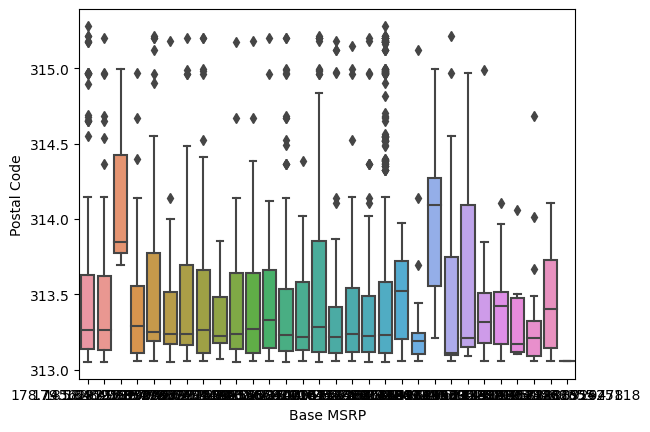

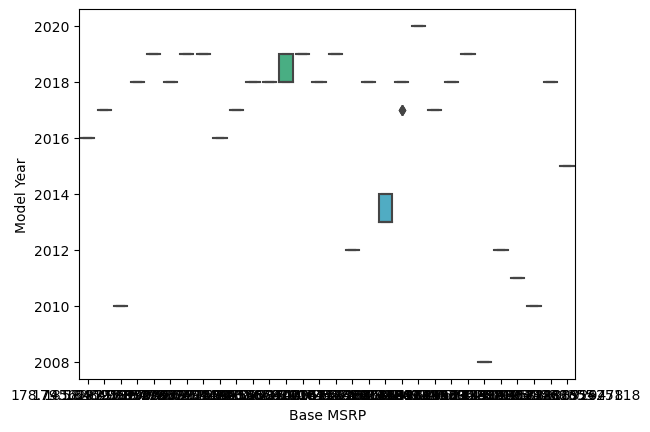

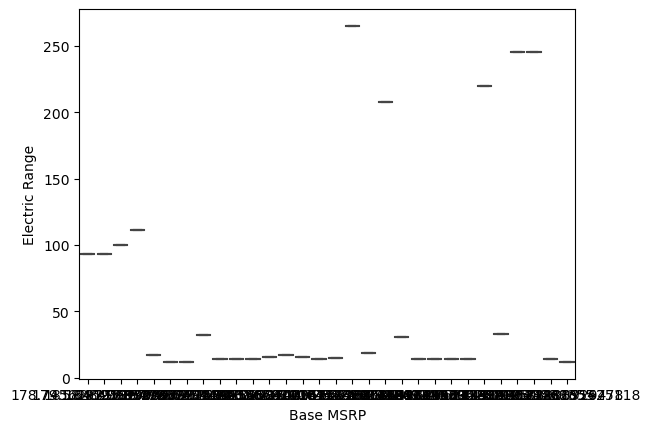

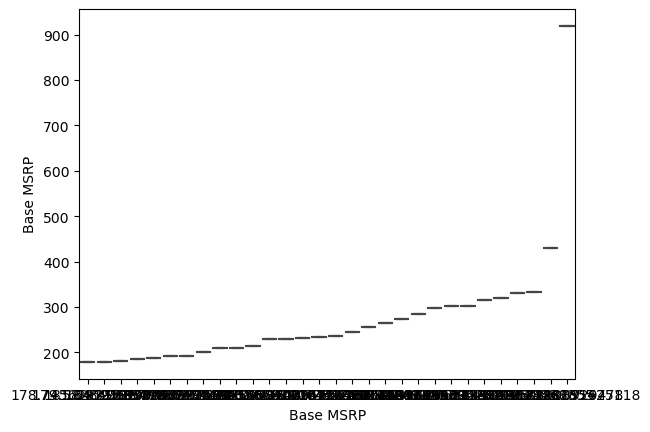

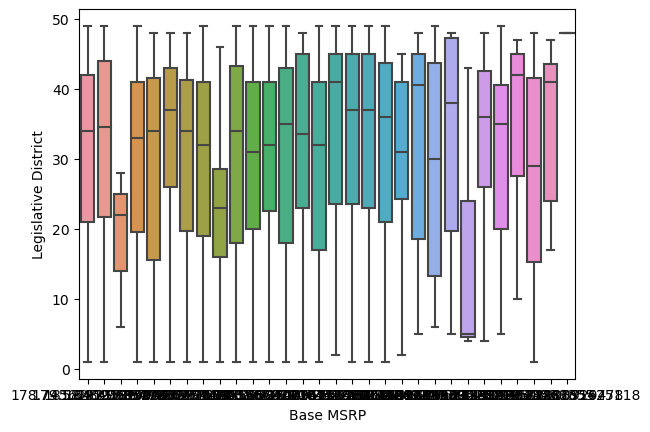

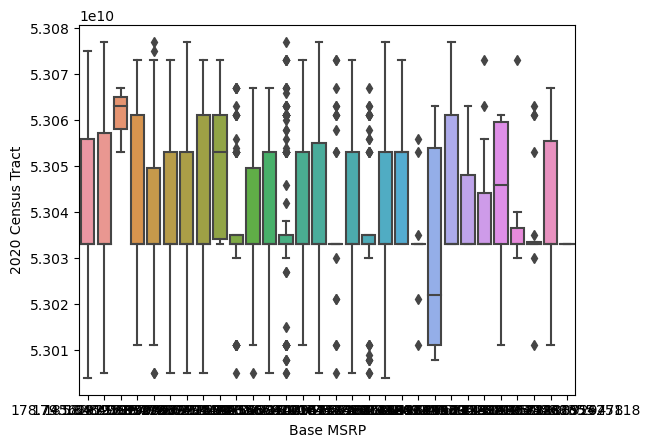

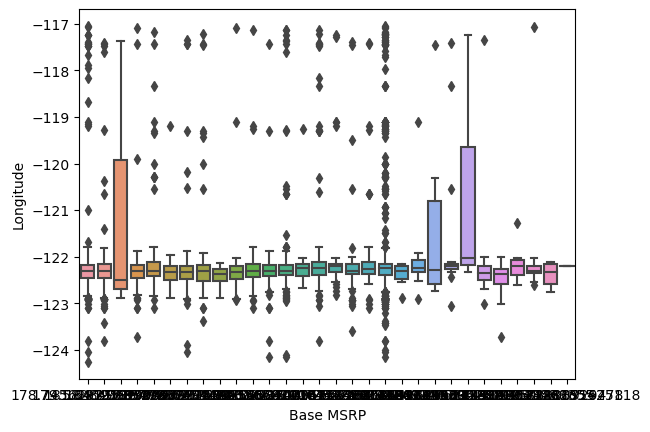

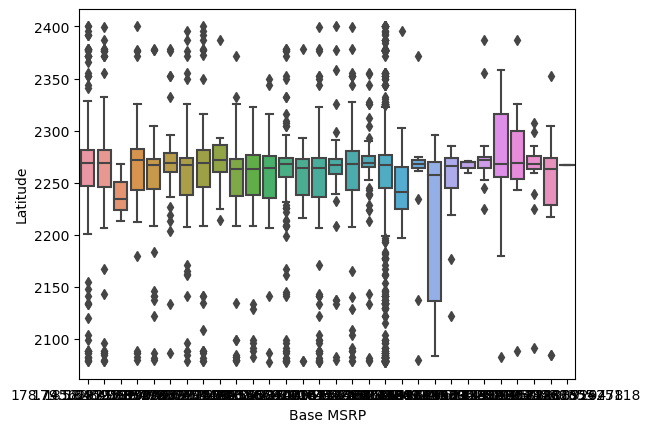

In [39]:
for col in con_cols:
    sns.boxplot(x='Base MSRP',y=col,data=df)
    plt.show()

In [40]:
# Target vs Categorical data
# Categorical vs Categorical

# Stacked bar chart

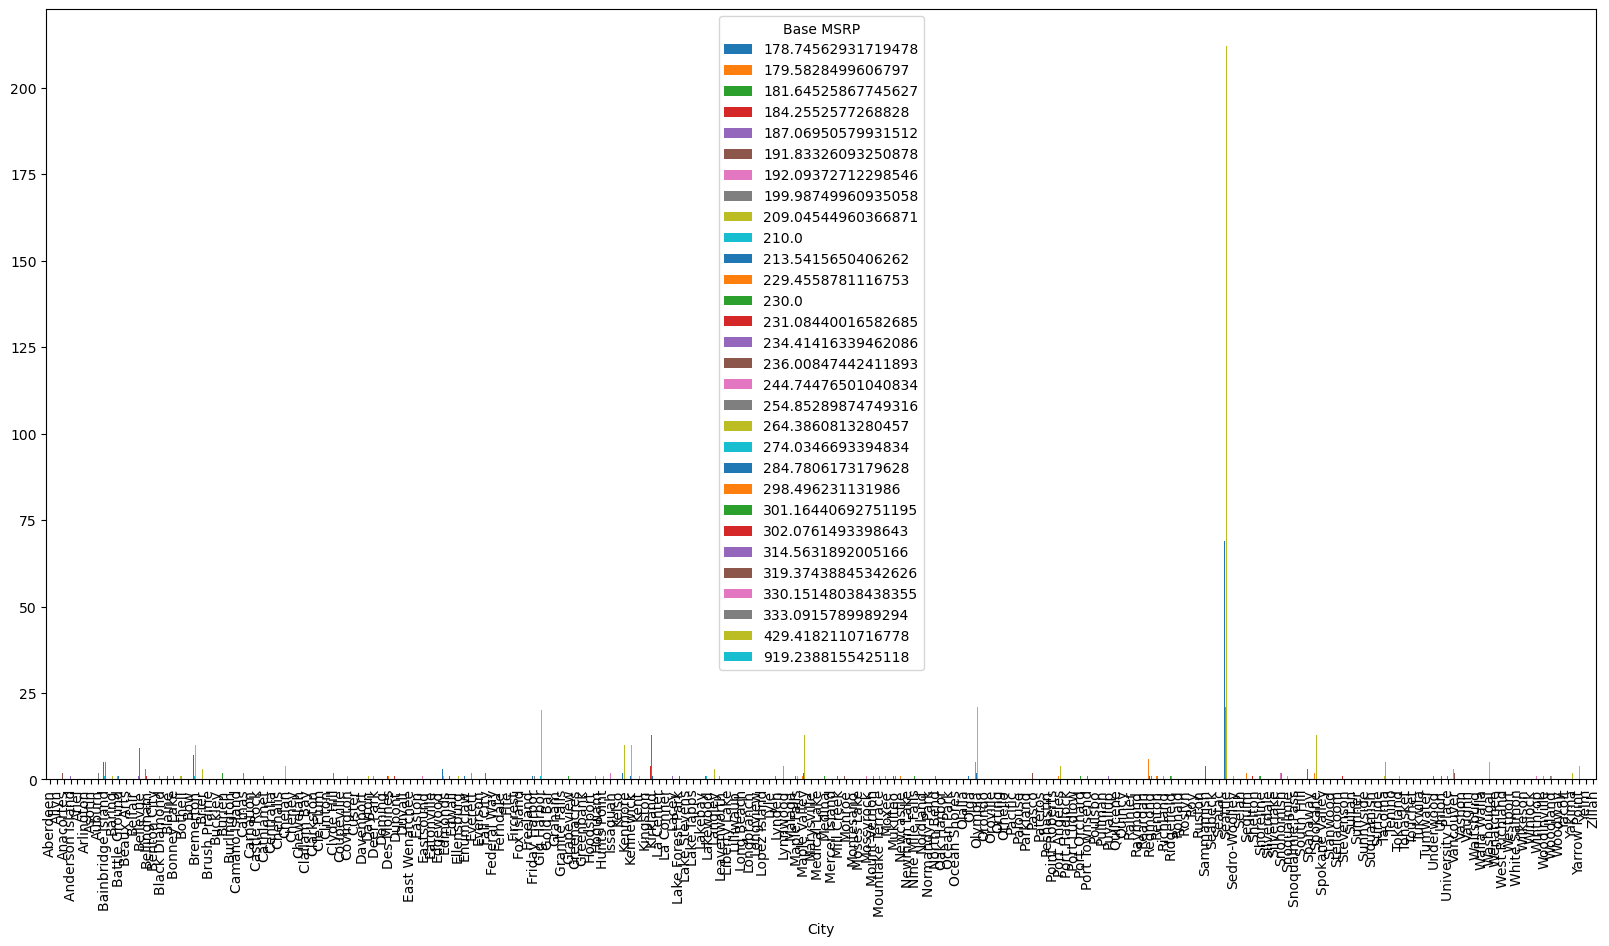

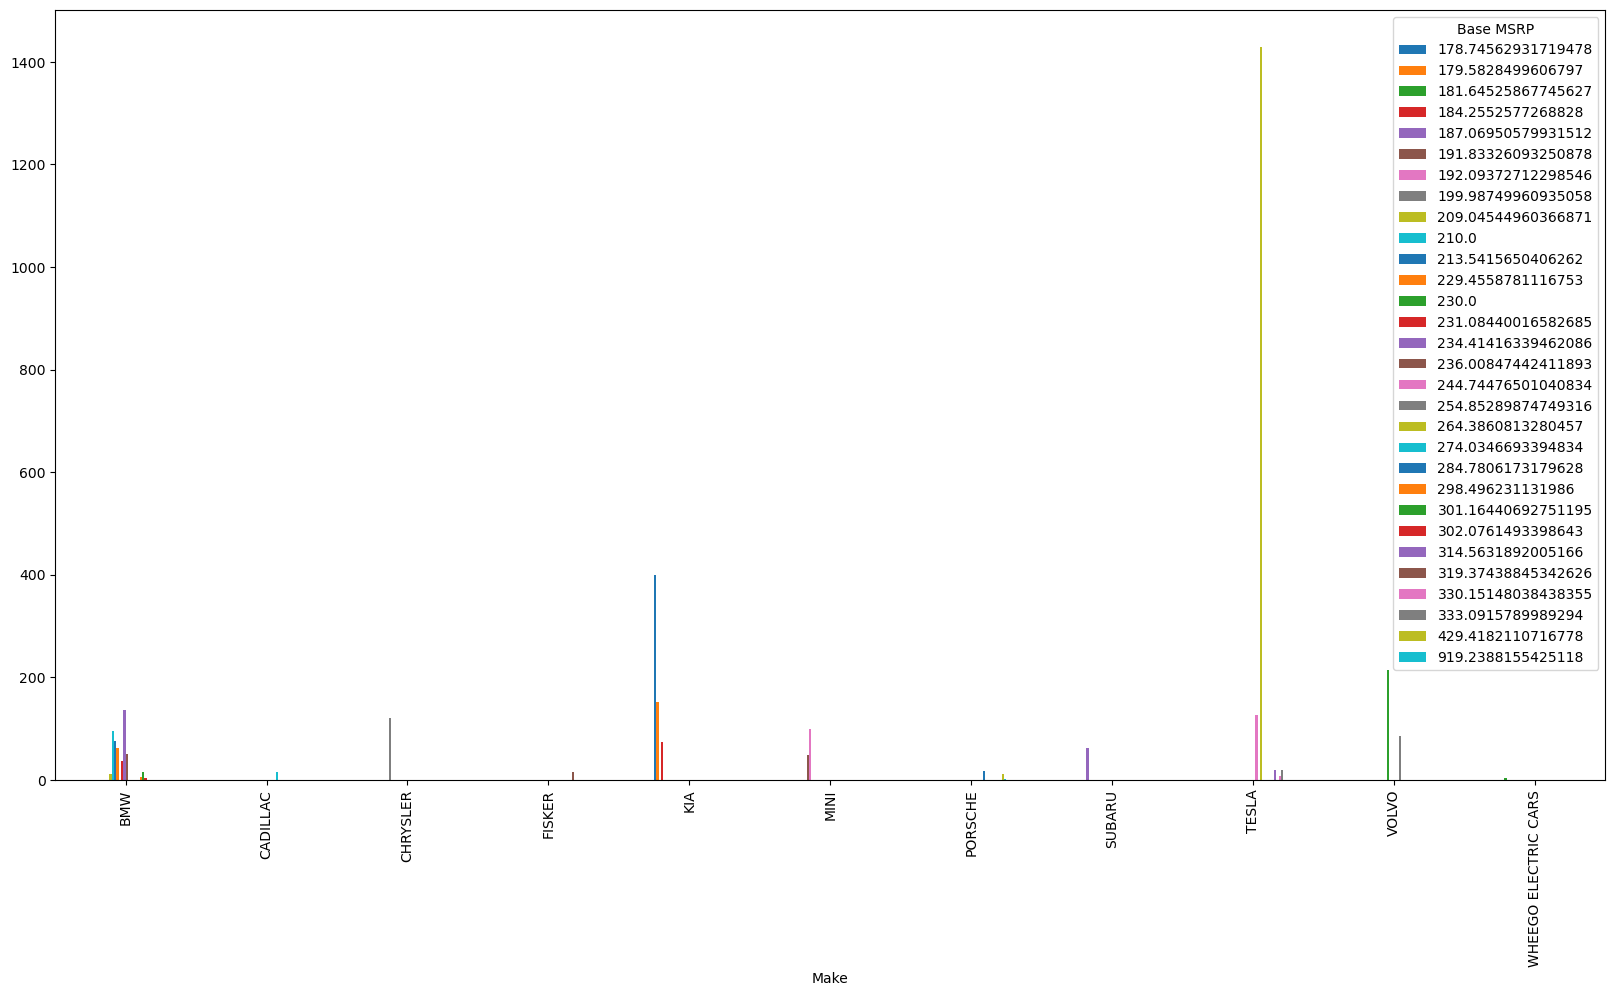

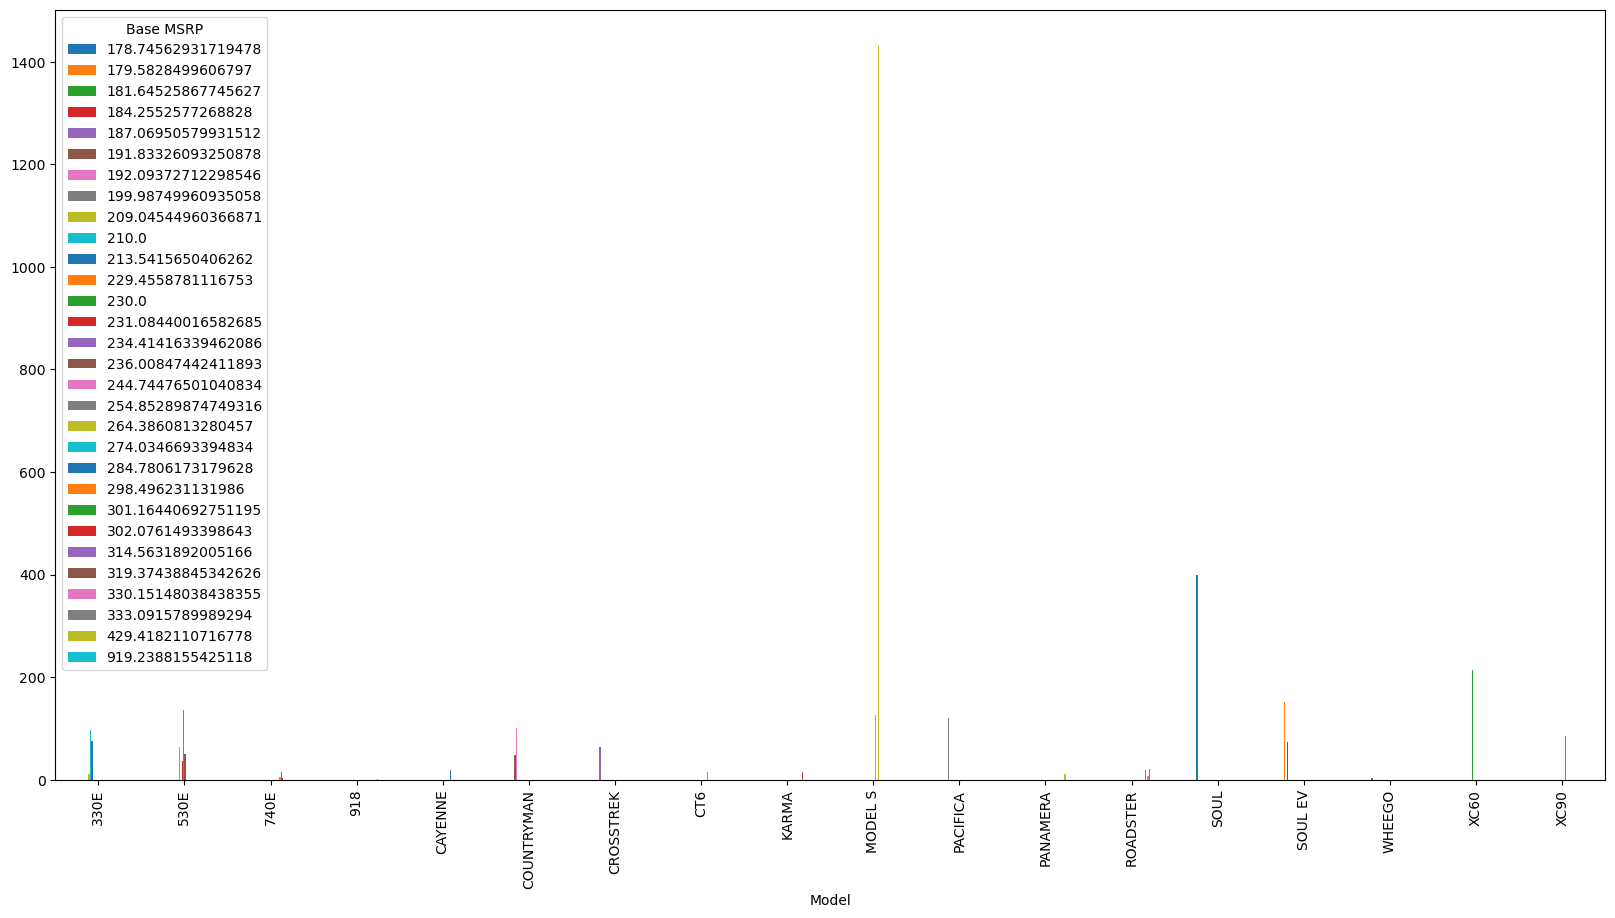

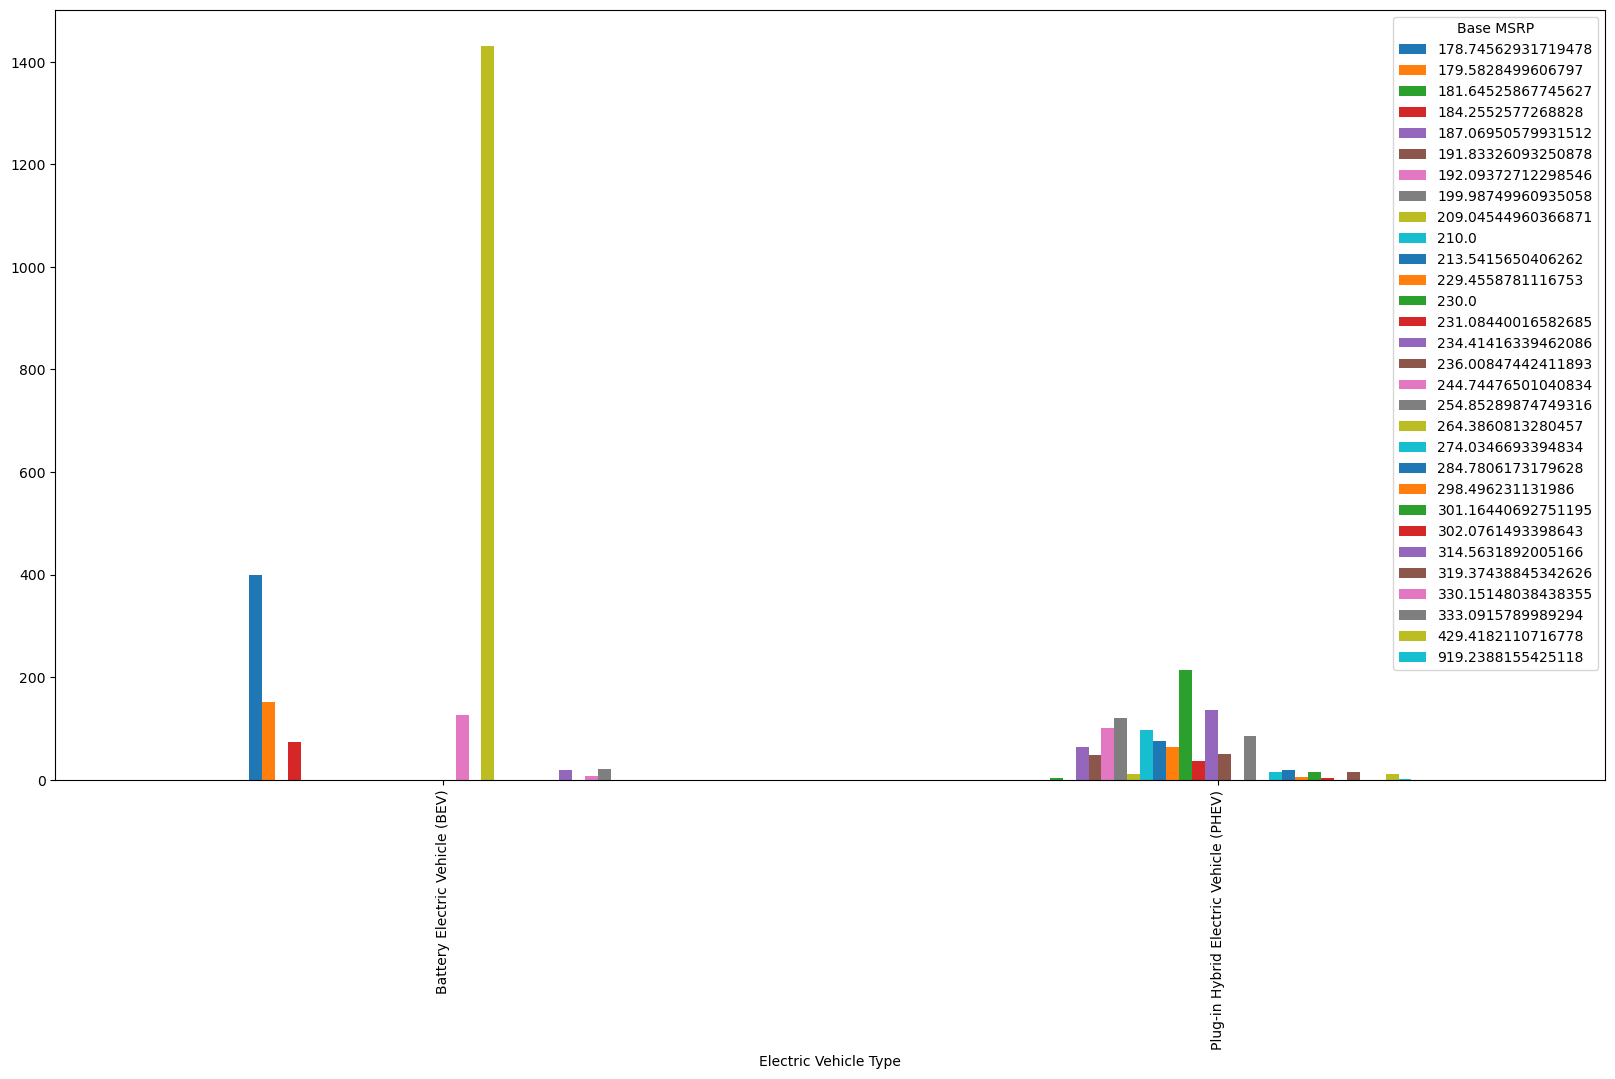

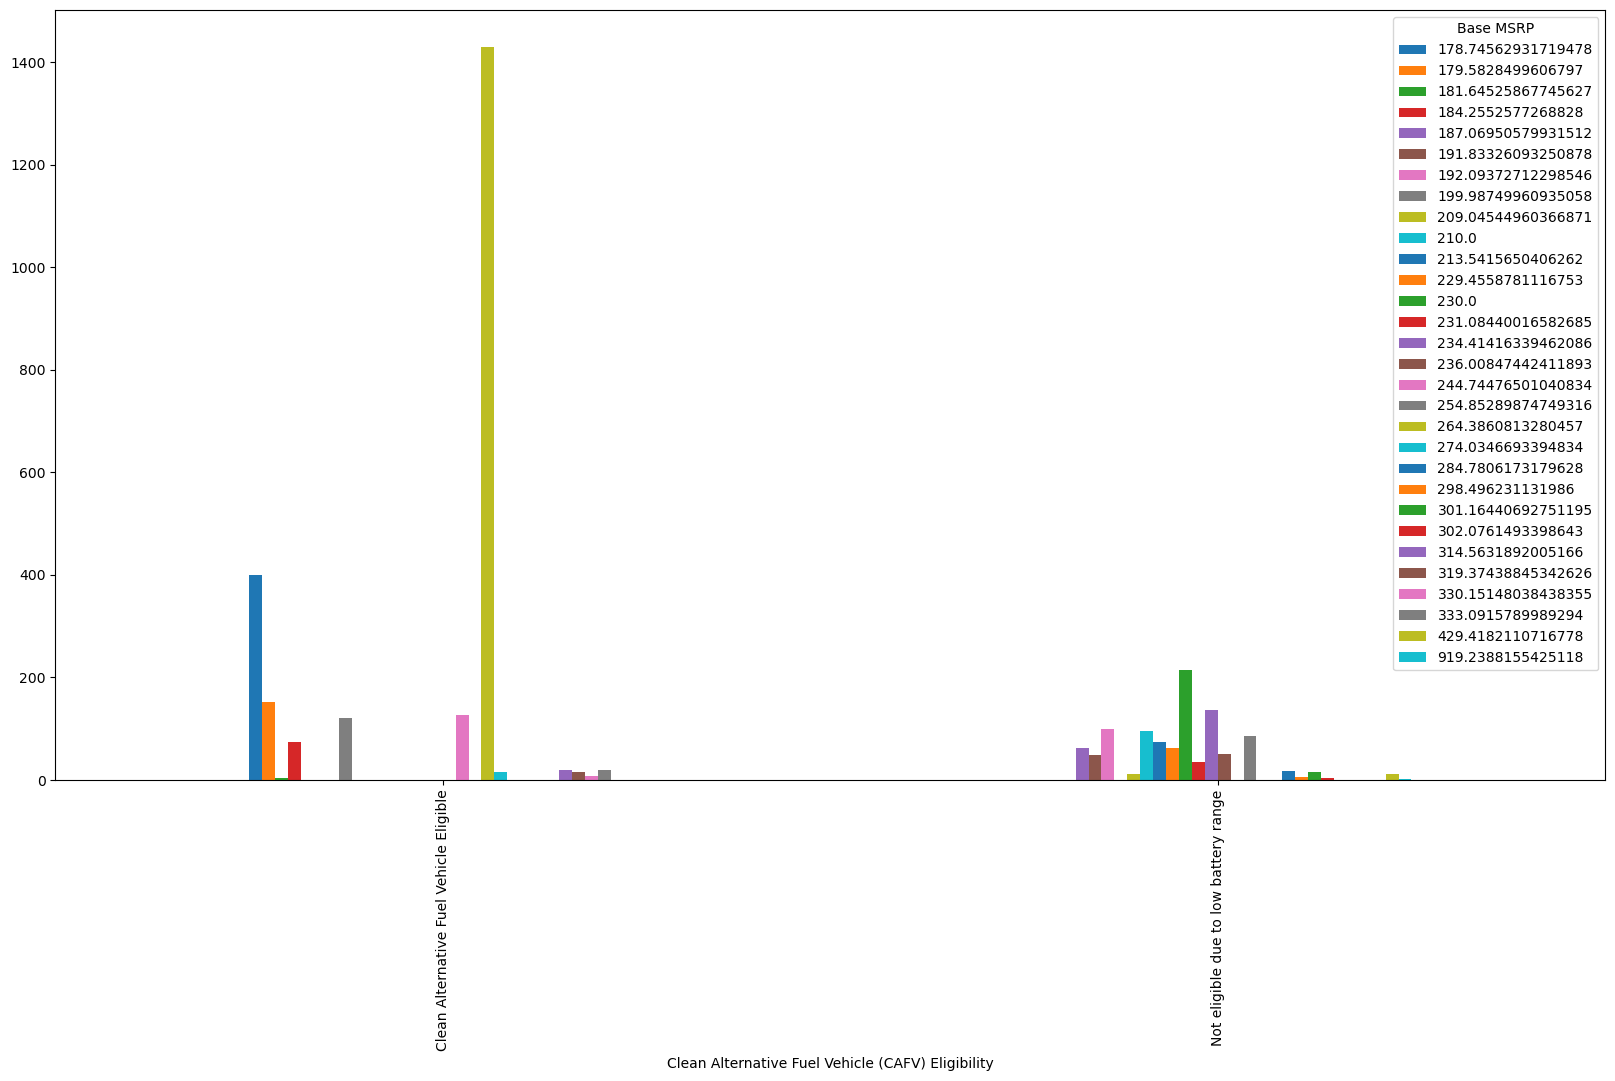

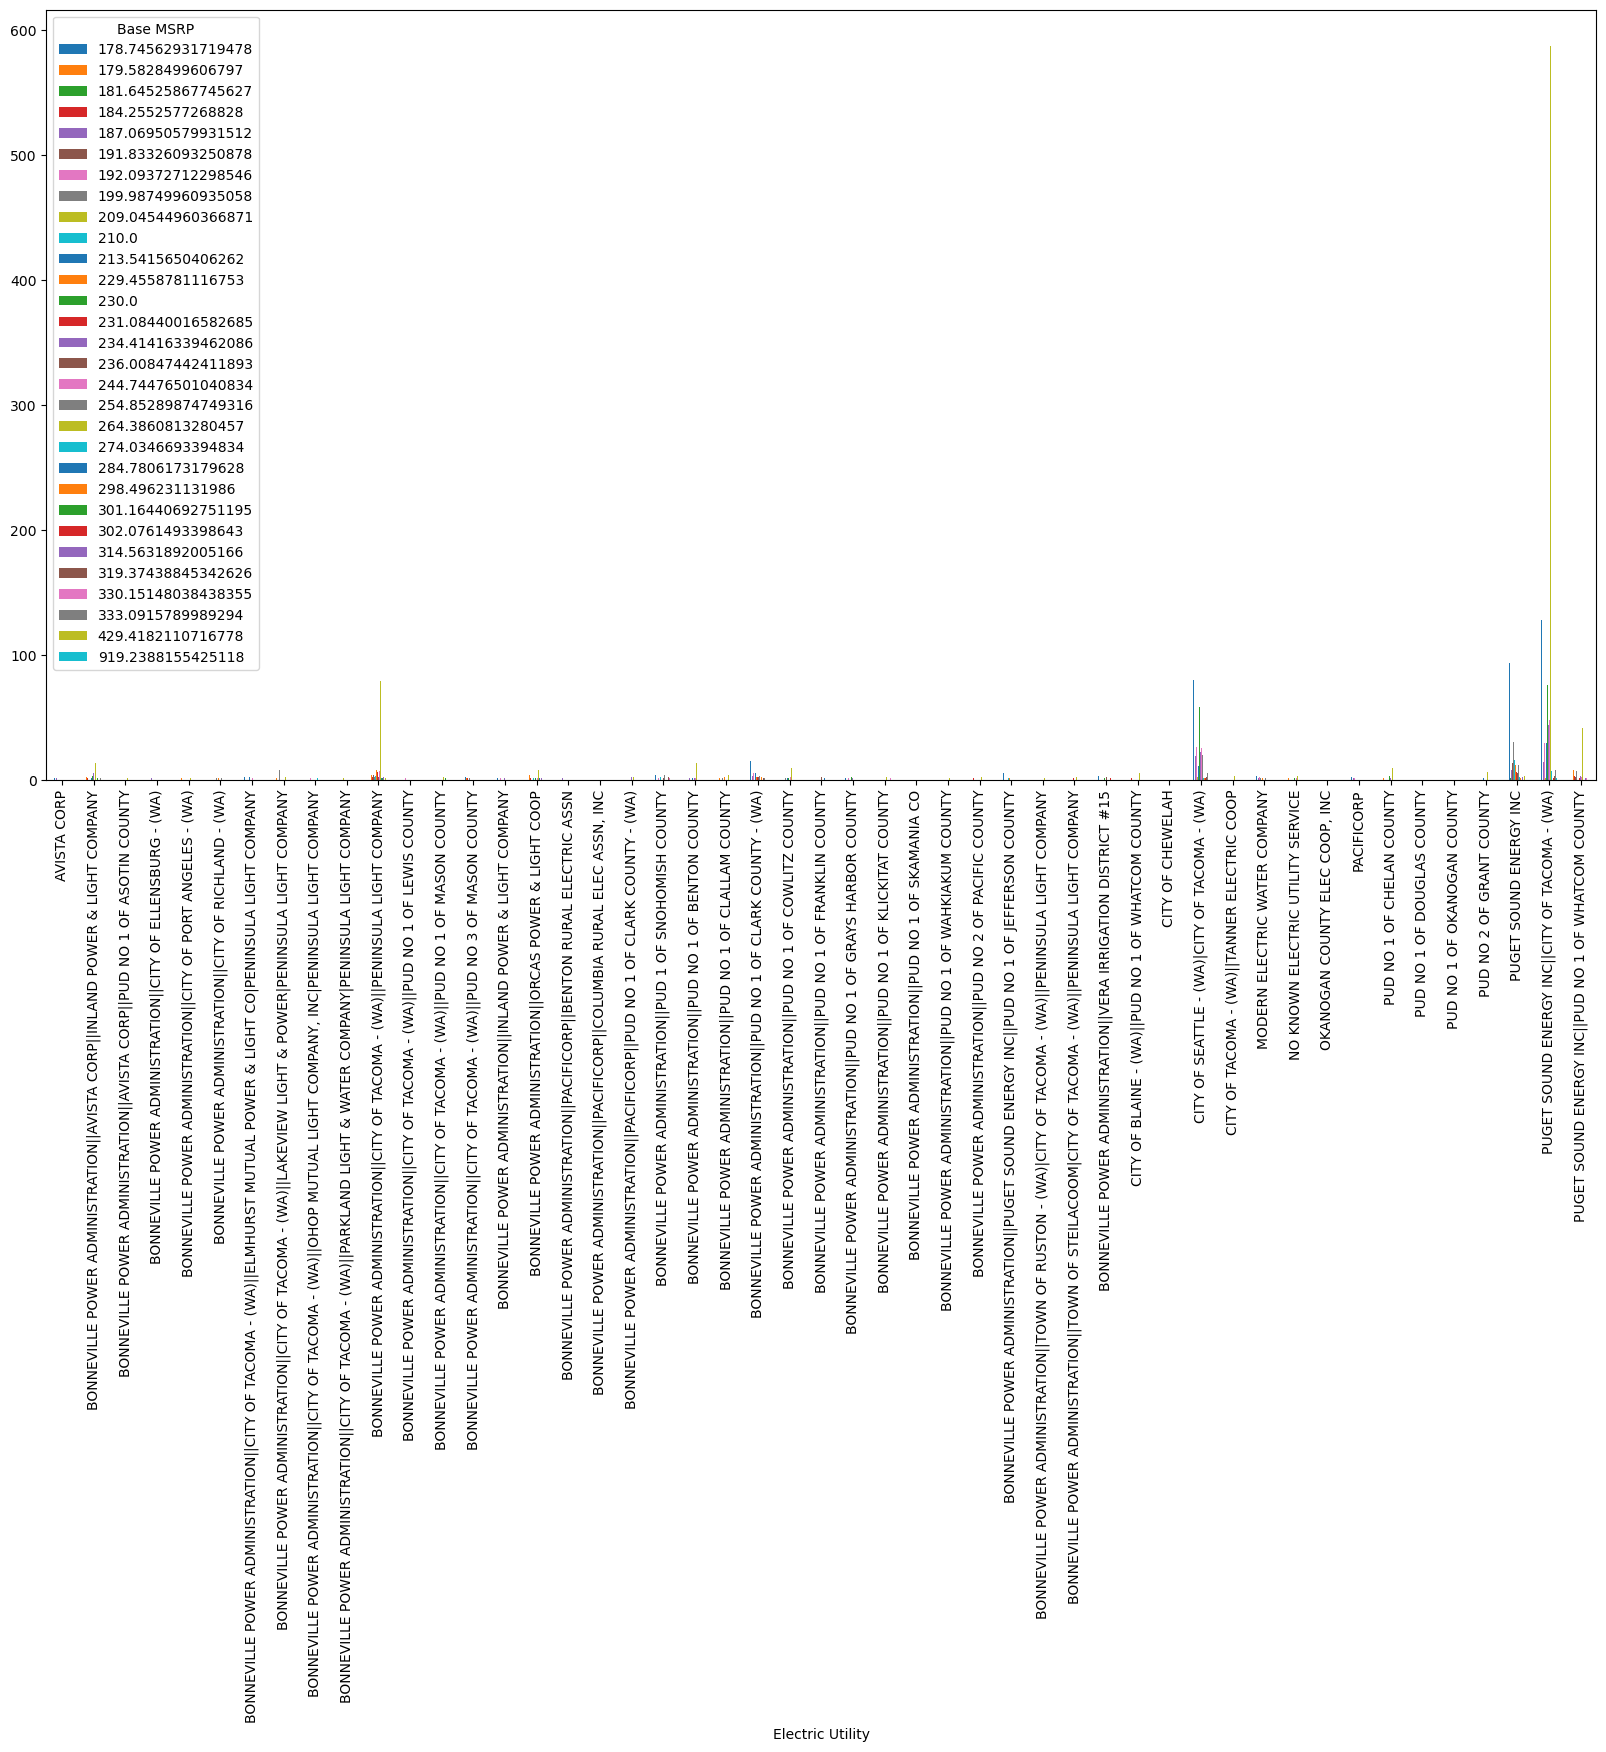

In [41]:
for col in cat_cols:
    pd.crosstab(df[col],df['Base MSRP']).plot(kind='bar',figsize=(20,10))
    plt.show()

<b> Correlation </b>

<AxesSubplot:>

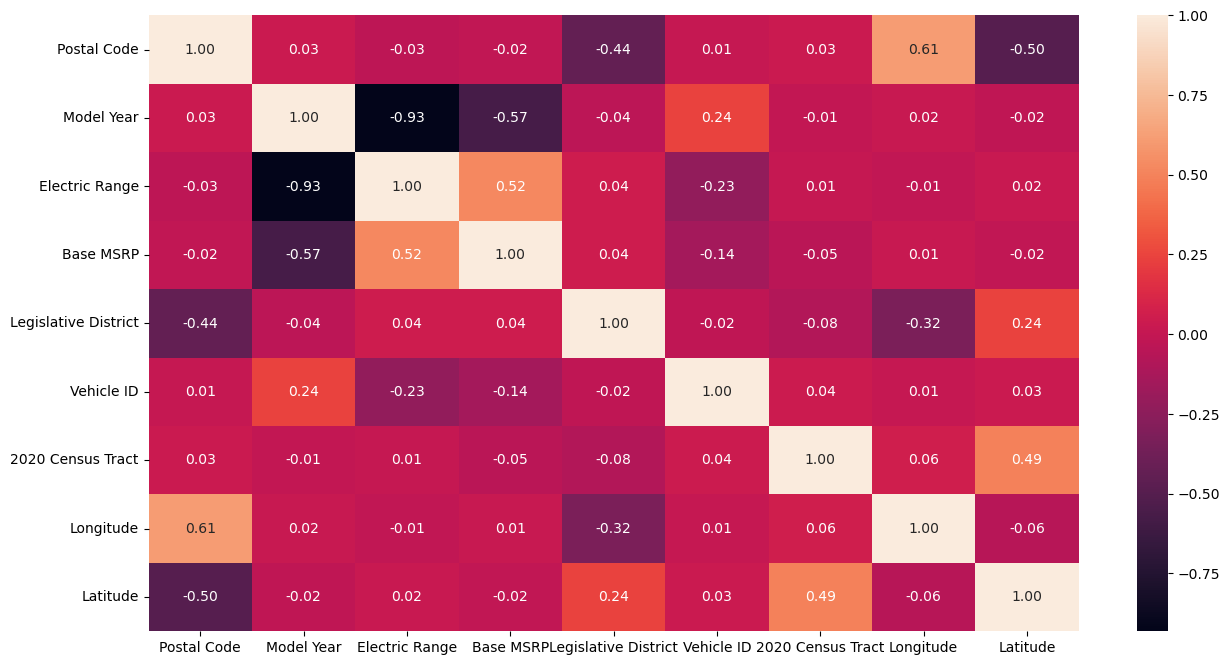

In [42]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,fmt="0.2f") 

<p> How Target variable is related with IDV?

1) 'Model Year' has 57% negative correlation

2) 'Electric Range' has 52% positive correlation
</p>

## Scaling

In [43]:
# Scaling  - Continuous data

In [44]:
from sklearn.preprocessing import StandardScaler

In [48]:
print(con_cols)

['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', '2020 Census Tract', 'Longitude', 'Latitude']


In [50]:
con_cols.remove('Base MSRP')

In [51]:
ss = StandardScaler()
X_con_scaled = pd.DataFrame(ss.fit_transform(df[con_cols]),columns=con_cols,index=df.index)
X_con_scaled.head()

,Postal Code,Model Year,Electric Range,Legislative District,2020 Census Tract,Longitude,Latitude
49,-0.277507,-1.039038,0.945817,0.232400,-0.423663,-0.229864,-0.067466
79,0.540886,1.398056,-1.248459,-0.249453,0.854212,-0.345678,-0.426810
82,0.479285,0.991873,-1.226069,-0.111781,0.854871,-0.328475,-0.671188
84,0.677759,0.585691,-0.341641,-0.111781,0.854876,-0.300813,-0.569328
134,-0.599659,-1.039038,0.945817,0.989597,-0.424052,-0.031420,0.424699


In [65]:
print("X_con_scaled: ", X_con_scaled.shape)

X_con_scaled:  (3419, 7)


## Encoding

In [52]:
# Categorical data - Numerical Data
# one hot encoding

In [53]:
print(cat_cols)

['City', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']


In [54]:
X_cat_enc = pd.get_dummies(df[cat_cols],drop_first=True) # function to execute one hot encoding

#### Merge Cat and Con data

In [101]:
X_final = pd.concat([X_con_scaled,X_cat_enc],axis=1)
X_final.head()

,Postal Code,Model Year,Electric Range,Legislative District,2020 Census Tract,Longitude,Latitude,City_Allyn,City_Anacortes,City_Anderson Island,...,Electric Utility_NO KNOWN ELECTRIC UTILITY SERVICE,"Electric Utility_OKANOGAN COUNTY ELEC COOP, INC",Electric Utility_PACIFICORP,Electric Utility_PUD NO 1 OF CHELAN COUNTY,Electric Utility_PUD NO 1 OF DOUGLAS COUNTY,Electric Utility_PUD NO 1 OF OKANOGAN COUNTY,Electric Utility_PUD NO 2 OF GRANT COUNTY,Electric Utility_PUGET SOUND ENERGY INC,Electric Utility_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Electric Utility_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY
49,-0.277507,-1.039038,0.945817,0.232400,-0.423663,-0.229864,-0.067466,0,0,0,...,0,0,0,0,0,0,0,0,1,0
79,0.540886,1.398056,-1.248459,-0.249453,0.854212,-0.345678,-0.426810,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,0.479285,0.991873,-1.226069,-0.111781,0.854871,-0.328475,-0.671188,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,0.677759,0.585691,-0.341641,-0.111781,0.854876,-0.300813,-0.569328,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134,-0.599659,-1.039038,0.945817,0.989597,-0.424052,-0.031420,0.424699,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [102]:
X_final.shape

(3419, 307)

# Train Test Split

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
y= df['Base MSRP']

In [105]:
# Training - 80%, Testing = 20% (Random selection of train_test_split)

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y,test_size=0.2,random_state=42)

In [107]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (2735, 307)
X_test:  (684, 307)
y_train:  (2735,)
y_test:  (684,)


In [108]:
print("Tarin: " ,round(3419*0.8))
print("Test: " ,round(3419*0.2))

Tarin:  2735
Test:  684


<p> <b> Linear Regression Model</b>:<br/>
    
Checking Linearity using Redidual Plot - Whether the data exhibits a linear relationship<br/>  </p> 


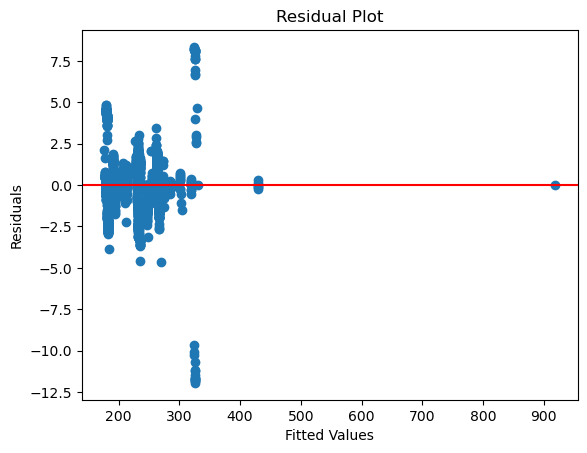

In [109]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
residuals = y_train - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


<p> The data does not exhibit linearity.</p>

## Impelementation Lasso Regression

<b>Losso Regression</b>

In [111]:
lasso = Lasso(alpha=1) #lamnda = alpha
lasso.fit(X_train,y_train)


print("Intercept:", lasso.intercept_)
print("Coefficient:", lasso.coef_)
 

print("*"*100)
print("\n")
print("Tain and Test Score")
#Tain and Test Score
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print('Train RMSE:',np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, y_test_pred))) 

print('Train MAPE:',np.sqrt(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Test MAPE:',np.sqrt(mean_absolute_percentage_error(y_test, y_test_pred)))

print('Train R2:',r2_score(y_train, y_train_pred))
print('Test R2:',r2_score(y_test, y_test_pred))

print("*"*100)
print("\n")
print("Cross Validation Score")

#Cross Validation Score

scores = cross_val_score(lasso,X_train,y_train,cv=3,scoring='r2') #cv=3 (train_split combinations)
print(scores)
print('Avg Score:', np.mean(scores))
print('Std Score: ', np.std(scores))


Intercept: 245.25571530826463
Coefficient: [ -0.         -18.65040566   0.           0.          -0.
   0.          -0.           0.           0.           0.
   0.          -0.           0.          -0.          -0.
   0.          -0.           0.           0.           0.
  -0.          -0.          -0.           0.          -0.
  -0.           0.          -0.           0.           0.
   0.          -0.           0.           0.          -0.
   0.           0.          -0.          -0.           0.
   0.           0.          -0.          -0.          -0.
   0.          -0.          -0.          -0.          -0.
   0.           0.          -0.          -0.          -0.
  -0.           0.          -0.          -0.          -0.
  -0.           0.          -0.           0.          -0.
  -0.           0.          -0.          -0.          -0.
   0.           0.          -0.           0.          -0.
   0.           0.           0.          -0.          -0.
   0.           0.          -

<b> Hyperparameter Tuning</b>

In [113]:
params = {'alpha':[0.1,0.5,0.8,1,1.2,1.5,2,2.5,3,3.5,4]}
# Lasso
grd_srch =GridSearchCV(Lasso(),params,scoring='r2',cv=3)
grd_srch.fit(X_train,y_train)
grid = pd.DataFrame(grd_srch.cv_results_)
grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.265456,6.363827e-02,0.010411,0.007362,0.1,{'alpha': 0.1},0.972244,0.763915,0.847978,0.861379,0.085576,1
1,0.041658,7.362155e-03,0.005206,0.007362,0.5,{'alpha': 0.5},0.823623,0.679087,0.850935,0.784548,0.075401,2
2,0.036453,7.364179e-03,0.005206,0.007362,0.8,{'alpha': 0.8},0.792043,0.600701,0.788982,0.727242,0.089487,3
3,0.038370,1.123938e-02,0.008450,0.006440,1,{'alpha': 1},0.762969,0.583599,0.740199,0.695589,0.079733,4
4,0.035450,5.950180e-03,0.005208,0.007365,1.2,{'alpha': 1.2},0.731759,0.572665,0.724935,0.676453,0.073442,5
5,0.036450,7.365246e-03,0.010414,0.007364,1.5,{'alpha': 1.5},0.715757,0.566511,0.713093,0.665120,0.069736,6
6,0.031243,1.123916e-07,0.010414,0.007364,2,{'alpha': 2},0.707739,0.558613,0.705116,0.657156,0.069688,7
7,0.036450,7.364179e-03,0.010414,0.007364,2.5,{'alpha': 2.5},0.697774,0.548587,0.694664,0.647009,0.069606,8
8,0.036451,7.362774e-03,0.005207,0.007363,3,{'alpha': 3},0.685596,0.536434,0.681737,0.634589,0.069424,9
9,0.036450,7.362942e-03,0.010413,0.007363,3.5,{'alpha': 3.5},0.671205,0.522153,0.666334,0.619897,0.069144,10


## Implementation of Decision Tree Classifier</b>

In [114]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
dt_classfier = DecisionTreeClassifier(criterion='gini')
dt_classfier.fit(X_train,y_train)

DecisionTreeClassifier()

In [117]:
from sklearn import tree

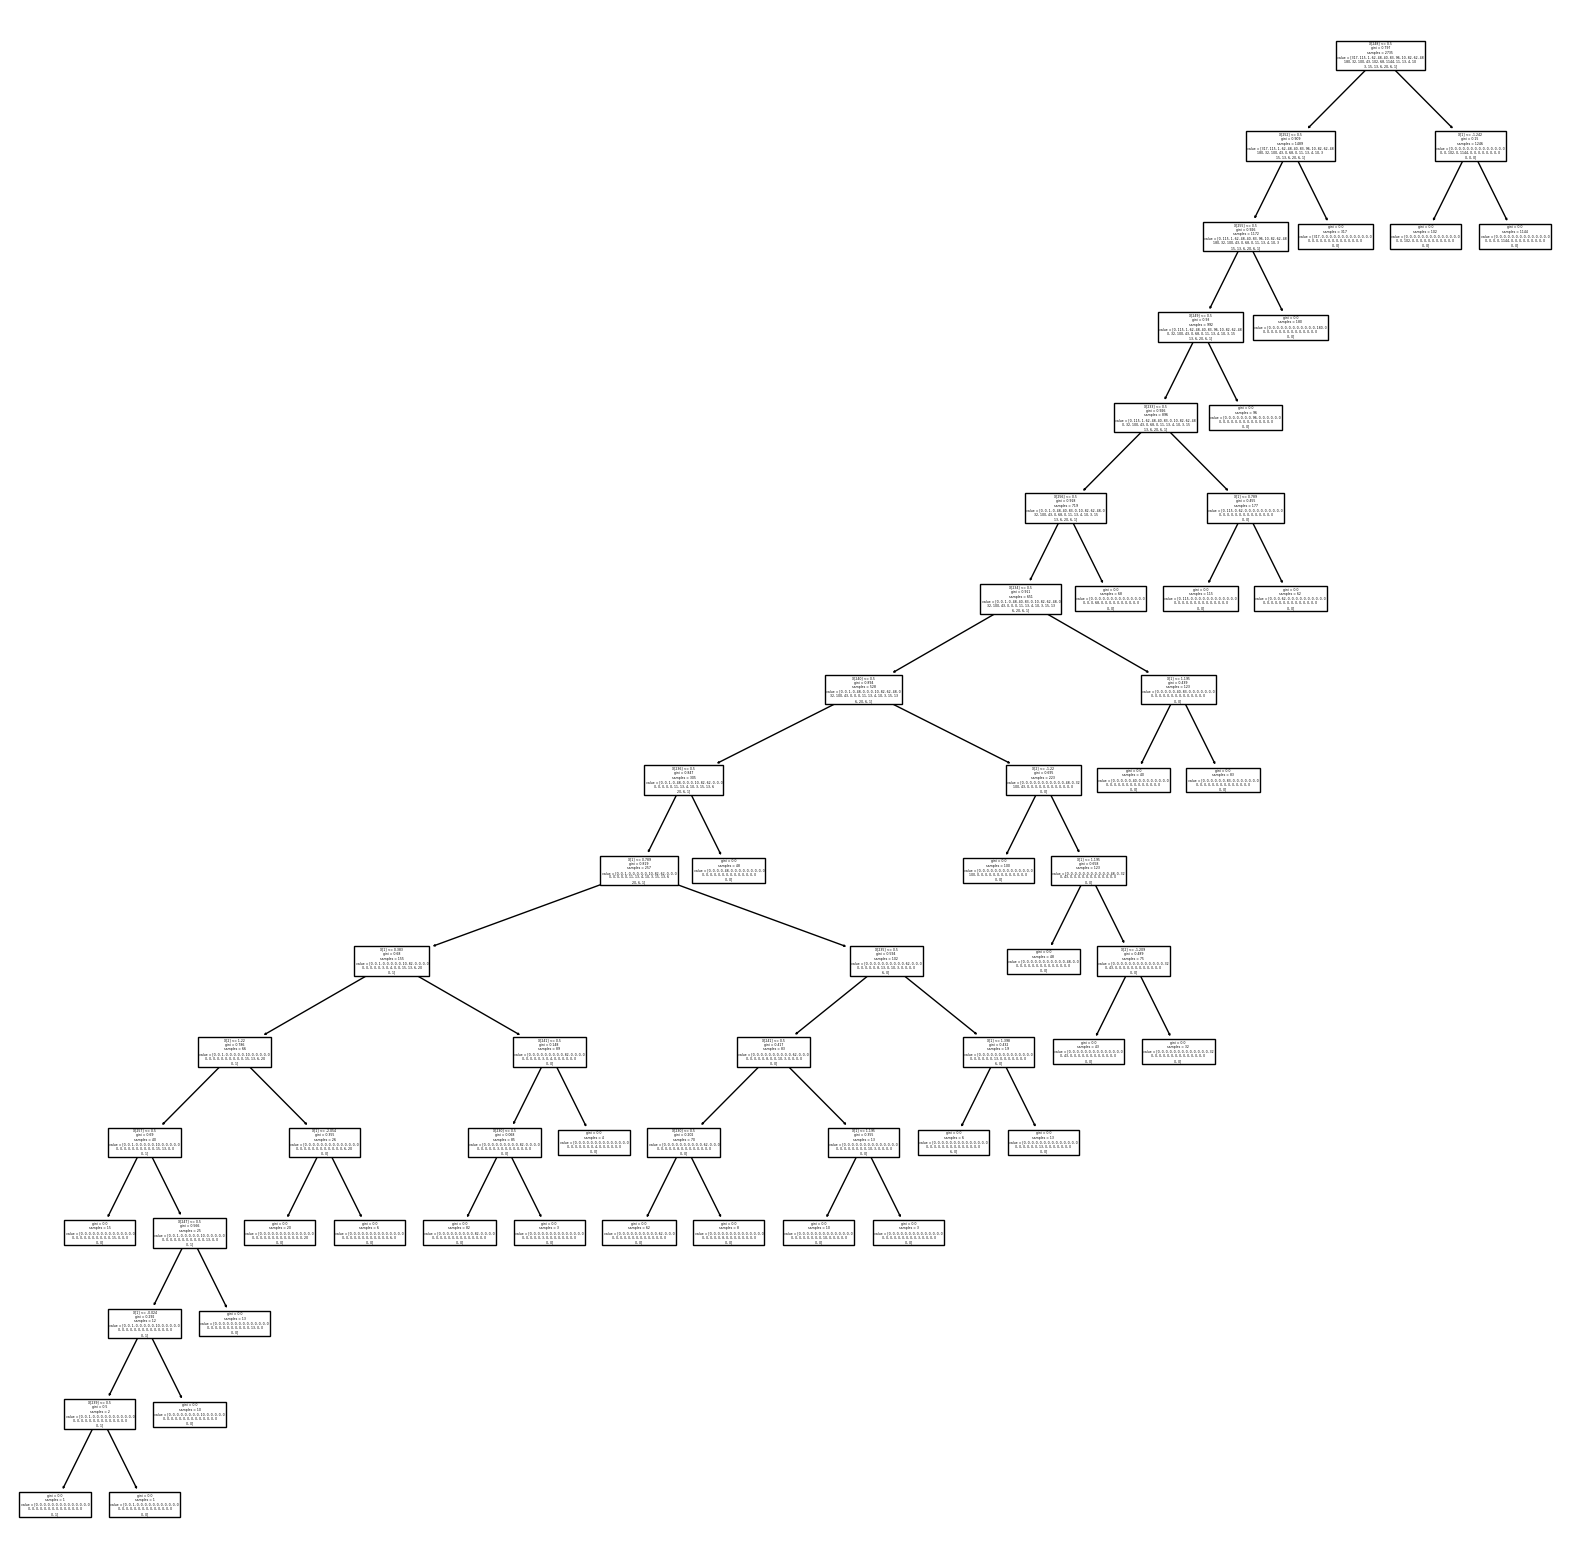

In [118]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_classfier)
plt.show()

# Performance Metrics

### Train & Test Score

In [119]:
from sklearn.metrics import confusion_matrix,classification_report,multilabel_confusion_matrix

In [120]:
y_train_pred = dt_classfier.predict(X_train)
y_test_pred = dt_classfier.predict(X_test)

In [121]:
label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)

In [126]:
print(y_test.shape)
print(y_test_pred.shape)
print(y_train.shape)
print(y_train_pred.shape)

(684,)
(684,)
(2735,)
(2735,)


Train confusion Matrix:


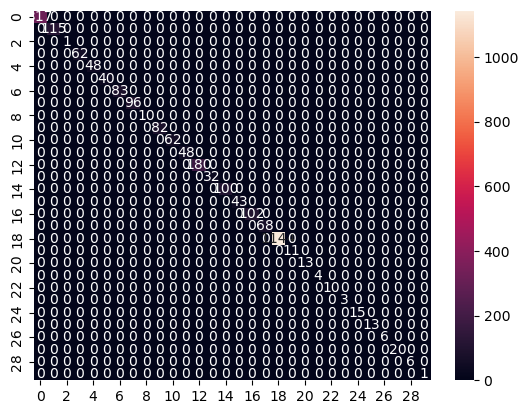

Test confusion Matrix:


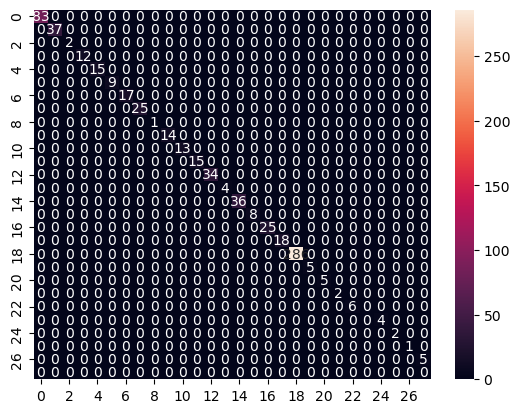

In [127]:
print('Train confusion Matrix:')
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt=".0f")
plt.show()
print('Test confusion Matrix:')
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt=".0f")
plt.show()

In [128]:
print('Train Classification Report:')
print(classification_report(y_train,y_train_pred))
print("-"*100)
print('Test Classification Matrix:')
print(classification_report(y_test,y_test_pred))

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       115
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        62
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        83
           7       1.00      1.00      1.00        96
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        82
          10       1.00      1.00      1.00        62
          11       1.00      1.00      1.00        48
          12       1.00      1.00      1.00       180
          13       1.00      1.00      1.00        32
          14       1.00      1.00      1.00       100
          15       1.00      1.00      1.00        43
          16       1.00      1.00      1.00       10

In [129]:
# Full grown decision will always overfit

### Cross validation Score

In [130]:
from sklearn.model_selection import cross_val_score

In [202]:
scores = cross_val_score(dt_classfier,X_train,y_train,scoring='recall',cv=5,n_jobs = -1)
print('Score:',scores)
print('Avg Score:',np.mean(scores))
print('Std Score:',np.std(scores))

Score: [nan nan nan nan nan]
Avg Score: nan
Std Score: nan


# Hyperparameter Tuning for Decision Tree Classifier

In [133]:
grid = {'max_depth':range(1,10),'min_samples_split':range(4,8,1),
       'max_leaf_nodes':range(3,10,1)}

In [134]:
grid_src = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'),param_grid=grid,cv=5,
            scoring='recall')
grid_src.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(3, 10),
                         'min_samples_split': range(4, 8)},
             scoring='recall')

In [135]:
pd.DataFrame(grid_src.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034212,0.010545,0.010884,0.003024,1,3,4,"{'max_depth': 1, 'max_leaf_nodes': 3, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.031242,0.009877,0.012497,0.006248,1,3,5,"{'max_depth': 1, 'max_leaf_nodes': 3, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,159
2,0.024995,0.007653,0.015620,0.000004,1,3,6,"{'max_depth': 1, 'max_leaf_nodes': 3, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,160
3,0.034387,0.003481,0.013119,0.003179,1,3,7,"{'max_depth': 1, 'max_leaf_nodes': 3, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,161
4,0.045995,0.012578,0.011462,0.005926,1,4,4,"{'max_depth': 1, 'max_leaf_nodes': 4, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.065332,0.012838,0.012332,0.002800,9,8,7,"{'max_depth': 9, 'max_leaf_nodes': 8, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,89
248,0.066831,0.004122,0.011208,0.006549,9,9,4,"{'max_depth': 9, 'max_leaf_nodes': 9, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,90
249,0.073568,0.006331,0.009562,0.006384,9,9,5,"{'max_depth': 9, 'max_leaf_nodes': 9, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,91
250,0.071302,0.002971,0.012044,0.003429,9,9,6,"{'max_depth': 9, 'max_leaf_nodes': 9, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,220


In [136]:
grid_src.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=1, max_leaf_nodes=3,
                       min_samples_split=4)

# Performance Metrics

In [137]:
dt_tunned = DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=8,
                                  min_samples_split=5,class_weight='balanced')
dt_tunned.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, max_leaf_nodes=8,
                       min_samples_split=5)

### Train & Test Score

In [138]:
y_train_pred = dt_tunned.predict(X_train)
y_test_pred = dt_tunned.predict(X_test)

Train confusion Matrix:


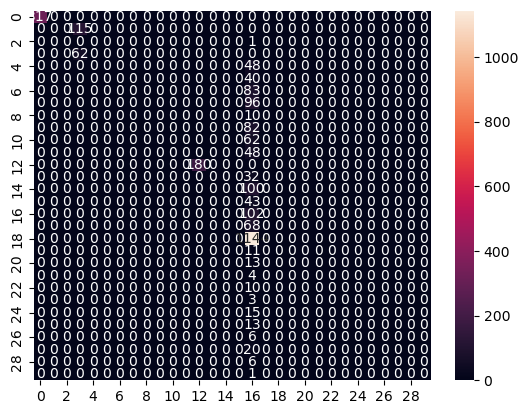

Test confusion Matrix:


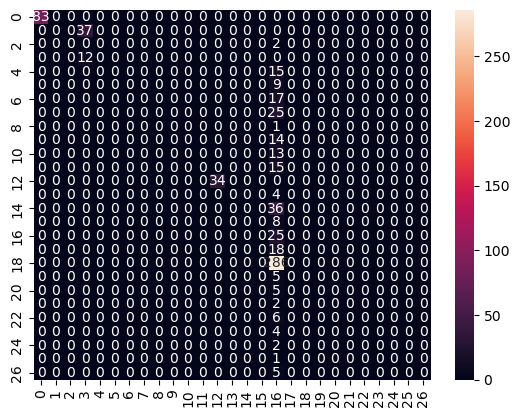

In [140]:
print('Train confusion Matrix:')
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt=".0f")
plt.show()
print('Test confusion Matrix:')
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt=".0f")
plt.show()

In [141]:
print('Train Classification Report:')
print(classification_report(y_train,y_train_pred))
print("-"*100)
print('Test Classification Matrix:')
print(classification_report(y_test,y_test_pred))

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       0.00      0.00      0.00       115
           2       0.00      0.00      0.00         1
           3       0.35      1.00      0.52        62
           4       0.00      0.00      0.00        48
           5       0.00      0.00      0.00        40
           6       0.00      0.00      0.00        83
           7       0.00      0.00      0.00        96
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        82
          10       0.00      0.00      0.00        62
          11       0.00      0.00      0.00        48
          12       1.00      1.00      1.00       180
          13       0.00      0.00      0.00        32
          14       0.00      0.00      0.00       100
          15       0.00      0.00      0.00        43
          16       0.05      1.00      0.09       10

In [143]:
# Handled the overfitting and built and generalized model.

### Cross validation Score

In [145]:
scores = cross_val_score(dt_tunned,X_train,y_train,scoring='recall',cv=5)
print('Score:',scores)
print('Avg Score:',np.mean(scores))
print('Std Score:',np.std(scores))

Score: [nan nan nan nan nan]
Avg Score: nan
Std Score: nan


In [146]:
# Hyperparametert tuning is mandatory in Decision Tree. If we go with default values, we will get a 
# full grown Decision Tree which will overfit.

# Feature Importance

In [147]:
# Feature Importance will be in %

In [149]:
fi = pd.DataFrame({"Columns":X_train.columns,
            "Feature_Importance": dt_tunned.feature_importances_
             }
            )
fi.sort_values(by='Feature_Importance',ascending=False)

,Columns,Feature_Importance
252,Model_SOUL,0.333333
253,Model_SOUL EV,0.333333
255,Model_XC60,0.333333
0,Postal Code,0.000000
203,City_Touchet,0.000000
...,...,...
101,City_Lakewood,0.000000
100,City_Lakebay,0.000000
99,City_Lake Tapps,0.000000
98,City_Lake Stevens,0.000000


In [150]:
# Feature Importance are calculated by  gini importance

# Ensemble Methods

## Bagging Classfier  

In [151]:
from sklearn.ensemble import BaggingClassifier

In [152]:
bag_class_log = BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced'),
                             n_estimators=20,max_samples=0.8,max_features=0.5,
                              bootstrap=True,bootstrap_features=False
                         )
bag_class_log.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced'),
                  max_features=0.5, max_samples=0.8, n_estimators=20)

In [153]:
# To find the best parameters, perform Grid search

### Train & Test Score

In [154]:
y_train_pred = bag_class_log.predict(X_train)
y_test_pred = bag_class_log.predict(X_test)

Train confusion Matrix:


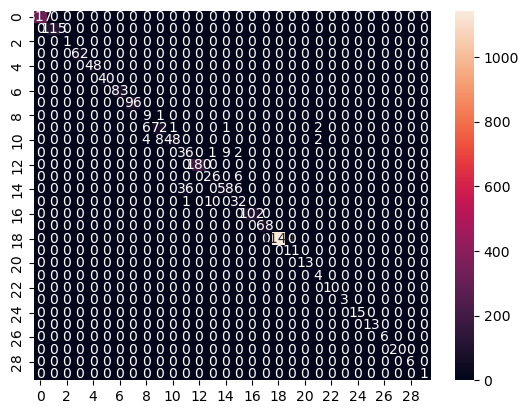

Test confusion Matrix:


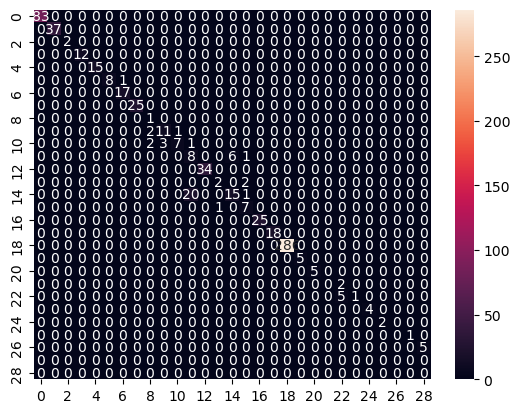

In [155]:
print('Train confusion Matrix:')
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt=".0f")
plt.show()
print('Test confusion Matrix:')
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt=".0f")
plt.show()

In [156]:
print('Train Classification Report:')
print(classification_report(y_train,y_train_pred))
print("-"*100)
print('Test Classification Matrix:')
print(classification_report(y_test,y_test_pred))

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       115
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        62
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        83
           7       1.00      1.00      1.00        96
           8       0.47      0.90      0.62        10
           9       0.89      0.88      0.88        82
          10       0.98      0.77      0.86        62
          11       0.49      0.75      0.60        48
          12       1.00      1.00      1.00       180
          13       0.70      0.81      0.75        32
          14       0.85      0.58      0.69       100
          15       0.70      0.74      0.72        43
          16       1.00      1.00      1.00       10

### Cross validation Score

In [157]:
scores = cross_val_score(bag_class_log,X_train,y_train,scoring='recall',cv=5, )
print('Score:',scores)
print('Avg Score:',np.mean(scores))
print('Std Score:',np.std(scores))

Score: [nan nan nan nan nan]
Avg Score: nan
Std Score: nan


# Implementation of Randomforest 

In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
rf = RandomForestClassifier(n_estimators=150,criterion='gini',max_depth=5,
                           min_impurity_decrease=4,max_leaf_nodes=8,max_samples=0.7,
                           max_features=0.5,bootstrap=True,class_weight='balanced')
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=0.5,
                       max_leaf_nodes=8, max_samples=0.7,
                       min_impurity_decrease=4, n_estimators=150)

### Train & Test Score

In [160]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

Train confusion Matrix:


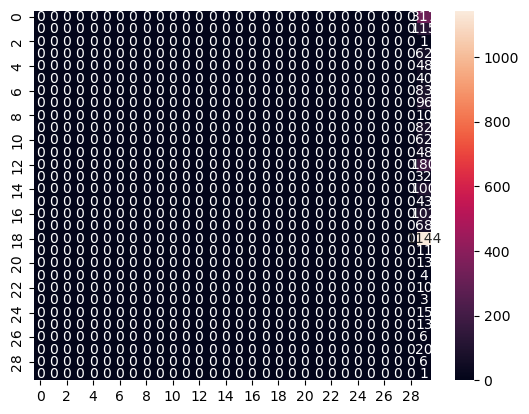

Test confusion Matrix:


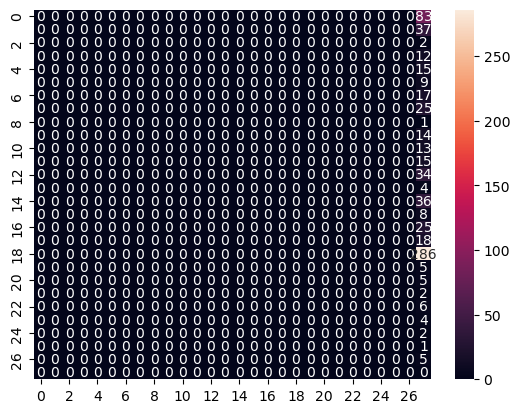

In [161]:
print('Train confusion Matrix:')
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt=".0f")
plt.show()
print('Test confusion Matrix:')
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt=".0f")
plt.show()

In [162]:
print('Train Classification Report:')
print(classification_report(y_train,y_train_pred))
print("-"*100)
print('Test Classification Matrix:')
print(classification_report(y_test,y_test_pred))

Train Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       317
           1       0.00      0.00      0.00       115
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        62
           4       0.00      0.00      0.00        48
           5       0.00      0.00      0.00        40
           6       0.00      0.00      0.00        83
           7       0.00      0.00      0.00        96
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        82
          10       0.00      0.00      0.00        62
          11       0.00      0.00      0.00        48
          12       0.00      0.00      0.00       180
          13       0.00      0.00      0.00        32
          14       0.00      0.00      0.00       100
          15       0.00      0.00      0.00        43
          16       0.00      0.00      0.00       10

### Cross validation Score 

In [163]:
scores = cross_val_score(rf,X_train,y_train,scoring='recall',cv=5)
print('Score:',scores)
print('Avg Score:',np.mean(scores))
print('Std Score:',np.std(scores))

Score: [nan nan nan nan nan]
Avg Score: nan
Std Score: nan


In [164]:
# Model perfoermance is bad. Hyperparmeter tuning is needed

 # Implementation of Gradient Boosting Classification

In [165]:
from sklearn.ensemble import GradientBoostingClassifier

In [166]:
gb_classifier = GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,max_depth=2)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=2)

### Train & Test Score

In [167]:
y_train_pred = gb_classifier.predict(X_train)
y_test_pred = gb_classifier.predict(X_test)

Train confusion Matrix:


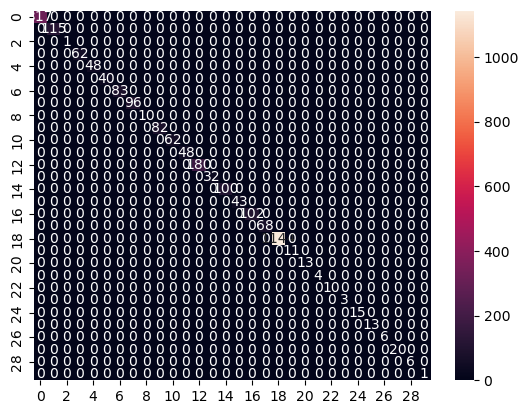

Test confusion Matrix:


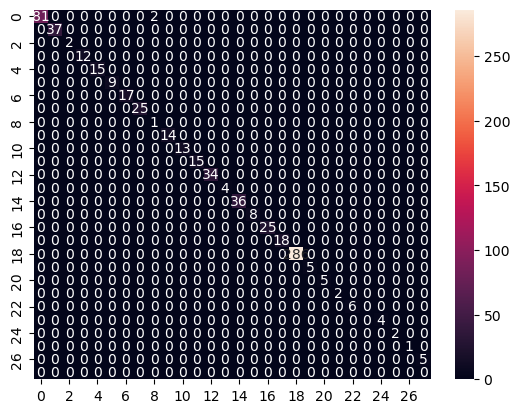

In [168]:
print('Train confusion Matrix:')
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt=".0f")
plt.show()
print('Test confusion Matrix:')
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt=".0f")
plt.show()

In [169]:
print('Train Classification Report:')
print(classification_report(y_train,y_train_pred))
print("-"*100)
print('Test Classification Matrix:')
print(classification_report(y_test,y_test_pred))

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       115
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        62
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        83
           7       1.00      1.00      1.00        96
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        82
          10       1.00      1.00      1.00        62
          11       1.00      1.00      1.00        48
          12       1.00      1.00      1.00       180
          13       1.00      1.00      1.00        32
          14       1.00      1.00      1.00       100
          15       1.00      1.00      1.00        43
          16       1.00      1.00      1.00       10

### Cross validation Score 

In [170]:
scores = cross_val_score(gb_classifier,X_train,y_train,scoring='recall',cv=5)
print('Score:',scores)
print('Avg Score:',np.mean(scores))
print('Std Score:',np.std(scores))

Score: [nan nan nan nan nan]
Avg Score: nan
Std Score: nan


In [173]:
# Since the data is high imbalanced. SMOTE is needed for the class balance
# Hyperparamater tuning is mandatory.

# XGBoost

In [ ]:
#!pip install xgboost

In [175]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)


X_train.columns = [regex.sub("_",col) if any(x in str(col) for x in set(('[',']','<'))) else col for col in X_train.columns.values] 
X_test.columns = [regex.sub("_",col) if any(x in str(col) for x in set(('[',']','<'))) else col for col in X_test.columns.values]


In [176]:
from xgboost import XGBClassifier

In [177]:
xgb = XGBClassifier(n_estimator=100, max_depth=3, reg_lambda=1,  learning_rate=0.1)
xgb.fit(X_train, y_train)

[21:44:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimator=100, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [178]:
xgb.predict(X_train)

array([18, 18, 13, ..., 13,  7, 27], dtype=int64)

### Train & Test Score

In [179]:
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

Train confusion Matrix:


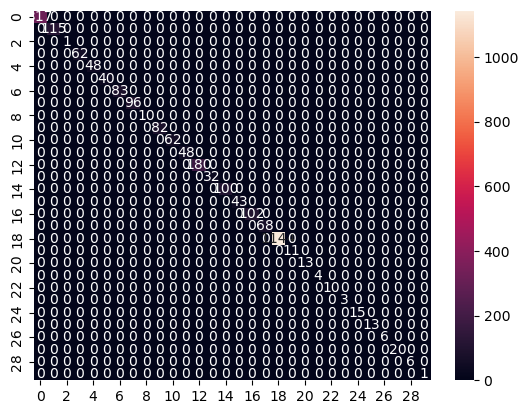

Test confusion Matrix:


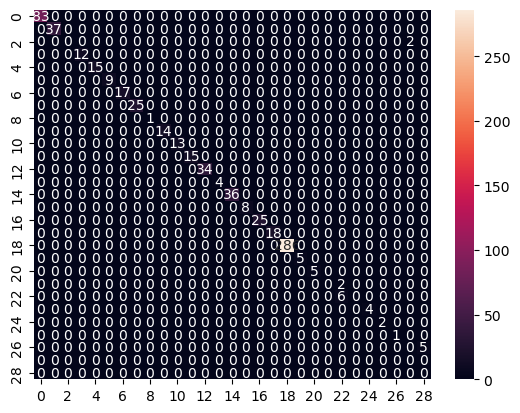

In [180]:
print('Train confusion Matrix:')
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt=".0f")
plt.show()
print('Test confusion Matrix:')
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt=".0f")
plt.show()

In [181]:
print('Train Classification Report:')
print(classification_report(y_train,y_train_pred))
print("-"*100)
print('Test Classification Matrix:')
print(classification_report(y_test,y_test_pred))

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       115
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        62
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        83
           7       1.00      1.00      1.00        96
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        82
          10       1.00      1.00      1.00        62
          11       1.00      1.00      1.00        48
          12       1.00      1.00      1.00       180
          13       1.00      1.00      1.00        32
          14       1.00      1.00      1.00       100
          15       1.00      1.00      1.00        43
          16       1.00      1.00      1.00       10

### Cross validation Score 

In [200]:
scores = cross_val_score(xgb,X_train,y_train,scoring='recall',cv=5)
print('Score:',scores)
print('Avg Score:',np.mean(scores))
print('Std Score:',np.std(scores))

[22:05:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[22:05:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[22:06:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[22:06:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.

Score: [nan nan nan nan nan]
Avg Score: nan
Std Score: nan


 # Bias & Variance Tradeoff

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

In [186]:
# First way to do
depths = range(1,51)
train_scores = []
test_scores = []
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, class_weight='balanced')
    dt.fit(X_train, y_train)
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)
    train_scores.append(recall_score(y_train, y_train_pred, average='micro'))
    test_scores.append(recall_score(y_test, y_test_pred, average='micro'))

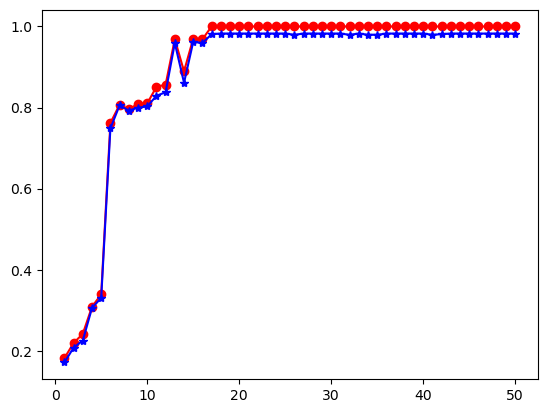

In [187]:
plt.plot(depths, train_scores, color='red', marker='o')
plt.plot(depths, test_scores, color='blue', marker='*')
plt.show()

In [195]:
# Second way to do
depths = range(1,51)
bias_scores = []
var_scores = []
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, class_weight='balanced')
    dt.fit(X_train, y_train)
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='recall')
    bias_scores.append(1-np.mean(scores))
    var_scores.append(np.std(scores)/np.mean(scores))
    
    

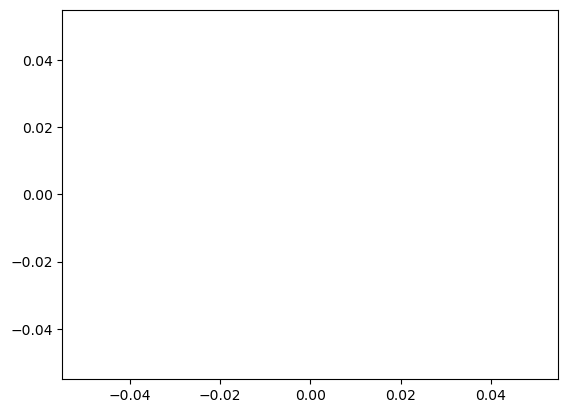

In [196]:
plt.plot(depths, bias_scores, color='red', marker='o')
plt.plot(depths, var_scores, color='blue', marker='*')
plt.show()

# Hypothesis Testing

In [ ]:
import scipy.stats as stats

In [ ]:
print(con_cols)

<p><b>'Postal Code' has any impact on 'Base MSRP'.</b>
    
Null Hypothesis (H0): There is no significant impact of 'Postal Code' on 'Base MSRP'.
    
Alternative Hypothesis (H1): 'Postal Code' has a significant impact on 'Base MSRP'. </p>

In [ ]:
postal_code_data = [data for data in df['Postal Code']]  
base_msrp_data = [data for data in df['Base MSRP']]  
t_statistic, p_value = stats.ttest_ind(base_msrp_data, postal_code_data)

alpha = 0.05 # Define the significance level (alpha)

# Check the p-value against the significance level
if p_value > alpha:
    print("Reject the null hypothesis (H0): 'Postal Code' has a significant impact on 'Base MSRP.'")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant impact of 'Postal Code' on 'Base MSRP.'")

<p> <b>'Model Year' has any impact on 'Base MSRP'.</b>

Null Hypothesis (H0): There is no significant impact of 'Model Year' on 'Base MSRP'.

Alternative Hypothesis (H1): 'Model Year' has a significant impact on 'Base MSRP'.</p>

In [ ]:
model_year_data = [data for data in df['Model Year']]  
base_msrp_data = [data for data in df['Base MSRP']]  
t_statistic, p_value = stats.ttest_ind(base_msrp_data, model_year_data)
# Define the significance level (alpha)
alpha = 0.05
# Check the p-value against the significance level
if p_value > alpha:
    print("Reject the null hypothesis (H0): 'Model Year' has a significant impact on 'Base MSRP'.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant impact of 'Model Year' on 'Base MSRP'.")

<p> <b>'Electric Range' has any impact on 'Base MSRP'.</b>

Null Hypothesis (H0): There is no significant impact of 'Electric Range' on 'Base MSRP'.

Alternative Hypothesis (H1): 'Electric Range' has a significant impact on 'Base MSRP'.</p>

In [ ]:
electric_range_data = [data for data in df['Electric Range']]  
base_msrp_data = [data for data in df['Base MSRP']]  
t_statistic, p_value = stats.ttest_ind(base_msrp_data, electric_range_data)
# Define the significance level (alpha)
alpha = 0.05
# Check the p-value against the significance level
if p_value > alpha:
    print("Reject the null hypothesis (H0): 'Electric Range' has a significant impact on 'Base MSRP'.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant impact of 'Electric Range' on 'Base MSRP'.")

<p> <b>'Legislative District' has any impact on 'Base MSRP'.</b>

Null Hypothesis (H0): There is no significant impact of 'Legislative District' on 'Base MSRP'.

Alternative Hypothesis (H1): 'Legislative District' has a significant impact on 'Base MSRP'.</p>

In [ ]:
legislative_district_data = [data for data in df['Legislative District']]  
base_msrp_data = [data for data in df['Base MSRP']]  
t_statistic, p_value = stats.ttest_ind(base_msrp_data, legislative_district_data)
# Define the significance level (alpha)
alpha = 0.05
# Check the p-value against the significance level
if p_value > alpha:
    print("Reject the null hypothesis (H0): 'Legislative District' has a significant impact on 'Base MSRP'.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant impact of 'Legislative District' on 'Base MSRP'.")

<p> <b>'2020 Census Tract' has any impact on 'Base MSRP'.</b>

Null Hypothesis (H0): There is no significant impact of 'Legislative District' on 'Base MSRP'.

Alternative Hypothesis (H1): 'Legislative District' has a significant impact on 'Base MSRP'.</p>

In [ ]:
census_tract_data = [data for data in df['2020 Census Tract']]  
base_msrp_data = [data for data in df['Base MSRP']]  
t_statistic, p_value = stats.ttest_ind(base_msrp_data, census_tract_data)
# Define the significance level (alpha)
alpha = 0.05
# Check the p-value against the significance level
if p_value > alpha:
    print("Reject the null hypothesis (H0): '2020 Census Tract' has a significant impact on 'Base MSRP'.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant impact of '2020 Census Tract' on 'Base MSRP'.")

<p> <b>'Longitude' has any impact on 'Base MSRP'.</b>

Null Hypothesis (H0): There is no significant impact of 'Legislative District' on 'Base MSRP'.

Alternative Hypothesis (H1): 'Legislative District' has a significant impact on 'Base MSRP'.</p>

In [ ]:
longitude_data = [data for data in df['Longitude']]  
base_msrp_data = [data for data in df['Base MSRP']]  
t_statistic, p_value = stats.ttest_ind(base_msrp_data, longitude_data)
# Define the significance level (alpha)
alpha = 0.05
# Check the p-value against the significance level
if p_value > alpha:
    print("Reject the null hypothesis (H0): 'Longitude' has a significant impact on 'Base MSRP'.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant impact of 'Longitude' on 'Base MSRP'.")

<p> <b>'Latitude' has any impact on 'Base MSRP'.</b>

Null Hypothesis (H0): There is no significant impact of 'Legislative District' on 'Base MSRP'.

Alternative Hypothesis (H1): 'Legislative District' has a significant impact on 'Base MSRP'.</p>

In [ ]:
latitude_data = [data for data in df['Latitude']]  
base_msrp_data = [data for data in df['Base MSRP']]  
t_statistic, p_value = stats.ttest_ind(base_msrp_data, longitude_data)
# Define the significance level (alpha)
alpha = 0.05
# Check the p-value against the significance level
if p_value > alpha:
    print("Reject the null hypothesis (H0): 'Latitude' has a significant impact on 'Base MSRP'.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant impact of 'Latitude' on 'Base MSRP'.")

<p> <b> Categorical variables has any impact on 'Base MSRP'.</b>
    
Null Hypothesis (H0): There is no significant association between the categorical variables and 'Base MSRP'.

Alternative Hypothesis (H1): There is a significant association between the categorical variables and 'Base MSRP'.</p>

In [ ]:
# Create a contingency table from the DataFrame
#contingency_table = df[cat_col]

contingency_table = pd.crosstab(df['Base MSRP'], [df['City'], df['Make'],df[ 'Model'],df['Electric Vehicle Type'],
                                            df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'],df['Electric Utility']])
 
# Perform the chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)

# Define the significance level (alpha)
alpha = 0.05

print("\n\n")

#Check the p-value against the significance level
if p_value > alpha:
    print("Reject the null hypothesis (H0): There is a significant association between the categorical variables and 'Base MSRP")
else:
    print("Fail to reject the null hypothesis (H0):  There is no significant association between the categorical variables and 'Base MSRP'.")

 #### Apply chi-square tests to analyze association between categorical variables.

In [ ]:
print(cat_cols)

<b> Hypothesis for categorical variables</b>
<p>Null Hypothesis (H0): There is no significant association between the categorical variables.

Alternative Hypothesis (H1): There is a significant association between the categorical variables.</p>

In [ ]:
# Create a contingency table from the DataFrame
#contingency_table = df[cat_col]

contingency_table = pd.crosstab(df['City'],[df['Make'],df[ 'Model'],df['Electric Vehicle Type'],
                                            df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'],df['Electric Utility']])
 
# Perform the chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)

# Define the significance level (alpha)
alpha = 0.05

print("\n\n")

#Check the p-value against the significance level
if p_value > alpha:
    print("Reject the null hypothesis (H0): There is a significant association between the categorical variables.")
else:
    print("Fail to reject the null hypothesis (H0):  There is no significant association between the categorical variables.")